# CPR appropriation with policy gradient

This notebook contains actual Harvest trainings for each implemented policy gradient method. The environment in use is a custom implementation of Harvest.

## Pre-requisites

The cells down below install and import the necessary libraries to successfully run the notebook examples.

In [1]:
import sys
sys.path.append('../')

In [2]:
%%capture
!pip install -r ../init/requirements.txt
!pip install ../src/gym_cpr_grid

In [3]:
import numpy as np
import gym

from src import memory, models, policies

%load_ext autoreload
%autoreload 2

## Utilities

The cell down below defines the environment, along with common variables to be used throughout the notebook.

In [4]:
env = gym.make(
    'gym_cpr_grid:CPRGridEnv-v0', 
    n_agents=1, 
    grid_width=25, 
    grid_height=7,
    tagging_ability=False,
    gifting_mechanism=None
)

In [5]:
observation_space_size = env.observation_space_size()
action_space_size = env.action_space_size()
epochs = 1000
steps_per_epoch = 3000
minibatch_size = 100
save_every = 100
hidden_sizes = [32, 32]
checkpoints_path = "../checkpoints"
render_every = 100
wandb_config = {
    "api_key": open("../wandb_api_key_file", "r").read().strip(),
    "project": "cpr-appropriation",
    "entity": "wadaboa",
}

## VPG

This section deals with training a set of Harvest agents using our custom Vanilla Policy Gradient implementation.

In [ ]:
vpg_policy_nn = models.MLP(observation_space_size, hidden_sizes, action_space_size)
vpg_baseline_nn = models.MLP(observation_space_size, hidden_sizes, 1, log_softmax=False)
vpg_policy = policies.VPGPolicy(env, vpg_policy_nn, baseline_nn=vpg_baseline_nn)
vpg_policy.train(
    epochs,
    steps_per_epoch,
    minibatch_size,
    enable_wandb=True,
    wandb_config={**wandb_config, "group": "VPG"},
    render_every=None,
    std_returns=False,
    std_advs=True
)

efficiency,18.33333
equality,1.0
sustainability,421.55848
peace,nan
loss,-37.46196
mean_return,18.33333
_runtime,1803
_timestamp,1629994769
_step,194


efficiency,▃▅▅▄▆▁▅▃▄▄▄▄▁▂▃▃▆▃▂▃▅▅▄▅█▄▂▅▇▃▃▇▅▄▃▆▅▆▅▅
equality,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sustainability,▄▆▆▅▃▁▄▂▄▂▂▃▃▄▅▁▇▆▁▃▂▃▄▆▃▄▁█▆▄▅▆▃▂▆▃▇▅█▄
peace,
loss,█▃▂▁▂▂▁▂▂▁▁▁▁▁▁▁▂▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
mean_return,▃▅▅▄▆▁▅▃▄▄▄▄▁▂▃▃▆▃▂▃▅▅▄▅█▄▂▅▇▃▃▇▅▄▃▆▅▆▅▅
_runtime,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


2021-08-26 18:19:37.328 | INFO     | src.policies:train:115 - Epoch 1 / 1000
2021-08-26 18:19:37.329 | INFO     | src.policies:collect_trajectories:212 - Episode 1
2021-08-26 18:19:39.285 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:19:39.286 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 301.44, 'peace': nan}
2021-08-26 18:19:39.287 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 25.0
2021-08-26 18:19:39.287 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.0
2021-08-26 18:19:39.288 | INFO     | src.policies:collect_trajectories:212 - Episode 2
2021-08-26 18:19:41.249 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:19:41.250 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 10.0, 'equality': 1.0, 'sustainability': 255.1, 

2021-08-26 18:19:45.373 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:19:45.374 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.044807836413383484
2021-08-26 18:19:45.376 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06379605829715729
2021-08-26 18:19:45.378 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.7258388996124268
2021-08-26 18:19:45.379 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06379605829715729
2021-08-26 18:19:45.381 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999985098838806
2021-08-26 18:19:45.383 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:19:45.384 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.15123671293258667
2021-08-26 18:19:45.386 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:19:45.486 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.556769847869873
2021-08-26 18:19:45.487 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04527886211872101
2021-08-26 18:19:45.489 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997913837433
2021-08-26 18:19:45.491 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:19:45.492 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.006330698728561401
2021-08-26 18:19:45.494 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09944403171539307
2021-08-26 18:19:45.495 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.7160849571228027
2021-08-26 18:19:45.497 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09944403171539307
2021-08-26

2021-08-26 18:19:49.647 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.0
2021-08-26 18:19:49.647 | INFO     | src.policies:collect_trajectories:212 - Episode 6
2021-08-26 18:19:51.746 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:19:51.747 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 323.625, 'peace': nan}
2021-08-26 18:19:51.748 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:19:51.748 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 18.666666666666668
2021-08-26 18:19:53.880 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:19:53.883 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.07556669414043427
2021-08-26 18:19:53.885 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1

2021-08-26 18:19:53.987 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.0555150508880615
2021-08-26 18:19:53.989 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10456952452659607
2021-08-26 18:19:53.990 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999998211860657
2021-08-26 18:19:53.993 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:19:53.994 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.08330053091049194
2021-08-26 18:19:53.996 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1071951612830162
2021-08-26 18:19:53.998 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.134439468383789
2021-08-26 18:19:54.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1071951612830162
2021-08-26 18

2021-08-26 18:19:54.103 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997317790985
2021-08-26 18:19:54.105 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:19:54.107 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.3892695903778076
2021-08-26 18:19:54.109 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2721658945083618
2021-08-26 18:19:54.110 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.8754897117614746
2021-08-26 18:19:54.111 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2721658945083618
2021-08-26 18:19:54.113 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997913837433
2021-08-26 18:19:54.115 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:19:54.117 | INFO     | src.policies:minibatc

2021-08-26 18:20:02.530 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.7147350311279297
2021-08-26 18:20:02.531 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06475331634283066
2021-08-26 18:20:02.533 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997019767761
2021-08-26 18:20:02.535 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:20:02.537 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.1587168574333191
2021-08-26 18:20:02.540 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1841241419315338
2021-08-26 18:20:02.541 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.6876521110534668
2021-08-26 18:20:02.542 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1841241419315338
2021-08-26 18

2021-08-26 18:20:02.646 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:20:02.647 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8127360939979553
2021-08-26 18:20:02.649 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03953006491065025
2021-08-26 18:20:02.650 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.2997063398361206
2021-08-26 18:20:02.652 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03953006491065025
2021-08-26 18:20:02.653 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999964237213135
2021-08-26 18:20:02.655 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:20:02.657 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.20889100432395935
2021-08-26 18:20:02.659 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:20:02.757 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.243829369544983
2021-08-26 18:20:02.759 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0821225494146347
2021-08-26 18:20:02.760 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999961256980896
2021-08-26 18:20:02.762 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:20:02.764 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4588254392147064
2021-08-26 18:20:02.766 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13863088190555573
2021-08-26 18:20:02.767 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.2048914432525635
2021-08-26 18:20:02.768 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13863088190555573
2021-08-26 

2021-08-26 18:20:11.609 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:20:11.610 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.104729175567627
2021-08-26 18:20:11.612 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04030495882034302
2021-08-26 18:20:11.613 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.0954517126083374
2021-08-26 18:20:11.615 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04030495882034302
2021-08-26 18:20:11.616 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999995231628418
2021-08-26 18:20:11.619 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:20:11.620 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0386052131652832
2021-08-26 18:20:11.623 | INFO     | src.policies:minibatch_update:276 - Policy network L2 grad

2021-08-26 18:20:11.724 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.9251724481582642
2021-08-26 18:20:11.725 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0819731205701828
2021-08-26 18:20:11.727 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.499999463558197
2021-08-26 18:20:11.728 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:20:11.730 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7792292833328247
2021-08-26 18:20:11.732 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10666388273239136
2021-08-26 18:20:11.733 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.9462882876396179
2021-08-26 18:20:11.734 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10666388273239136
2021-08-26 1

2021-08-26 18:20:11.840 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999993145465851
2021-08-26 18:20:11.842 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:20:11.844 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0264630317687988
2021-08-26 18:20:11.846 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03692556172609329
2021-08-26 18:20:11.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.7114843130111694
2021-08-26 18:20:11.848 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03692556172609329
2021-08-26 18:20:11.850 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999992251396179
2021-08-26 18:20:11.852 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:20:11.854 | INFO     | src.policies:minib

2021-08-26 18:20:20.011 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.5810860395431519
2021-08-26 18:20:20.012 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07160082459449768
2021-08-26 18:20:20.014 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999919533729553
2021-08-26 18:20:20.016 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:20:20.017 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.762610912322998
2021-08-26 18:20:20.020 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.052474282681941986
2021-08-26 18:20:20.021 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.5723782777786255
2021-08-26 18:20:20.022 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052474282681941986
2021-08-2

2021-08-26 18:20:20.126 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4733177721500397
2021-08-26 18:20:20.128 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:20:20.130 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5828303098678589
2021-08-26 18:20:20.132 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04862050339579582
2021-08-26 18:20:20.133 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.5080470442771912
2021-08-26 18:20:20.134 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04862050339579582
2021-08-26 18:20:20.136 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999989867210388
2021-08-26 18:20:20.138 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:20:20.139 | INFO     | src.policies:minib

2021-08-26 18:20:20.238 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06635911017656326
2021-08-26 18:20:20.239 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.3746826648712158
2021-08-26 18:20:20.241 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06635911017656326
2021-08-26 18:20:20.242 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.3746826648712158
2021-08-26 18:20:20.244 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:20:20.246 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7383063435554504
2021-08-26 18:20:20.248 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0635952278971672
2021-08-26 18:20:20.249 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.4123243987560272
2021-08-26 18:20:20.250 | 

2021-08-26 18:20:29.298 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:20:29.299 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.839255690574646
2021-08-26 18:20:29.302 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.029419418424367905
2021-08-26 18:20:29.303 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.3492740988731384
2021-08-26 18:20:29.304 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.029419418424367905
2021-08-26 18:20:29.306 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.3492740988731384
2021-08-26 18:20:29.308 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:20:29.309 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7327965497970581
2021-08-26 18:20:29.311 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gr

2021-08-26 18:20:29.436 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.32473841309547424
2021-08-26 18:20:29.438 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10396983474493027
2021-08-26 18:20:29.439 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.32473841309547424
2021-08-26 18:20:29.441 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:20:29.443 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.19394880533218384
2021-08-26 18:20:29.445 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0659773051738739
2021-08-26 18:20:29.446 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.3147009015083313
2021-08-26 18:20:29.448 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0659773051738739
2021-08-2

2021-08-26 18:20:29.551 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2598162293434143
2021-08-26 18:20:29.553 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:20:29.555 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8812656402587891
2021-08-26 18:20:29.557 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05919253081083298
2021-08-26 18:20:29.558 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.2569635808467865
2021-08-26 18:20:29.559 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05919253081083298
2021-08-26 18:20:29.562 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2569635808467865
2021-08-26 18:20:29.564 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:20:29.565 | INFO     | src.policies:minib

2021-08-26 18:20:39.789 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.2452784776687622
2021-08-26 18:20:39.791 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09423334151506424
2021-08-26 18:20:39.793 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2452784776687622
2021-08-26 18:20:39.795 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:20:39.797 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7756458520889282
2021-08-26 18:20:39.799 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13995805382728577
2021-08-26 18:20:39.800 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.22987429797649384
2021-08-26 18:20:39.801 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13995805382728577
2021-08-26

2021-08-26 18:20:39.908 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.21229280531406403
2021-08-26 18:20:39.910 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:20:39.912 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.10074913501739502
2021-08-26 18:20:39.914 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.060613349080085754
2021-08-26 18:20:39.915 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.2253914475440979
2021-08-26 18:20:39.917 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.060613349080085754
2021-08-26 18:20:39.918 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2253914475440979
2021-08-26 18:20:39.921 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:20:39.922 | INFO     | src.policies:m

2021-08-26 18:20:40.033 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08247515559196472
2021-08-26 18:20:40.034 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.19547192752361298
2021-08-26 18:20:40.036 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08247515559196472
2021-08-26 18:20:40.038 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.19547192752361298
2021-08-26 18:20:40.040 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 367.09480202337346, 'peace': nan}
2021-08-26 18:20:40.042 | INFO     | src.policies:train:115 - Epoch 8 / 1000
2021-08-26 18:20:40.043 | INFO     | src.policies:collect_trajectories:212 - Episode 22
2021-08-26 18:20:42.054 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:20:42.055 | IN

2021-08-26 18:20:48.879 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:20:48.881 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.016940951347351
2021-08-26 18:20:48.883 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10465234518051147
2021-08-26 18:20:48.884 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.1464567333459854
2021-08-26 18:20:48.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10465234518051147
2021-08-26 18:20:48.887 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.1464567333459854
2021-08-26 18:20:48.890 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:20:48.891 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8005127310752869
2021-08-26 18:20:48.894 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gra

2021-08-26 18:20:49.005 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.15345142781734467
2021-08-26 18:20:49.007 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0914965495467186
2021-08-26 18:20:49.008 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.15345142781734467
2021-08-26 18:20:49.011 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:20:49.012 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7785505056381226
2021-08-26 18:20:49.015 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12681891024112701
2021-08-26 18:20:49.016 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.16532975435256958
2021-08-26 18:20:49.018 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12681891024112701
2021-08-

2021-08-26 18:20:51.783 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 39.0
2021-08-26 18:20:51.784 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 39.0
2021-08-26 18:20:51.785 | INFO     | src.policies:collect_trajectories:212 - Episode 26
2021-08-26 18:20:54.171 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:20:54.172 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 27.0, 'equality': 1.0, 'sustainability': 487.51851851851853, 'peace': nan}
2021-08-26 18:20:54.172 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 27.0
2021-08-26 18:20:54.173 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 33.0
2021-08-26 18:20:54.174 | INFO     | src.policies:collect_trajectories:212 - Episode 27
2021-08-26 18:20:56.672 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
20

2021-08-26 18:20:59.528 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.14571890234947205
2021-08-26 18:20:59.529 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1932014673948288
2021-08-26 18:20:59.531 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.14571890234947205
2021-08-26 18:20:59.534 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:20:59.536 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6397907733917236
2021-08-26 18:20:59.539 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.046469371765851974
2021-08-26 18:20:59.541 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.14109714329242706
2021-08-26 18:20:59.543 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.046469371765851974
2021-0

2021-08-26 18:20:59.688 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10247807949781418
2021-08-26 18:20:59.692 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:20:59.695 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6140362024307251
2021-08-26 18:20:59.699 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08262207359075546
2021-08-26 18:20:59.701 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.11623431742191315
2021-08-26 18:20:59.704 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08262207359075546
2021-08-26 18:20:59.706 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.11623431742191315
2021-08-26 18:20:59.709 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:20:59.712 | INFO     | src.policies:mi

2021-08-26 18:21:07.583 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 12.0, 'equality': 1.0, 'sustainability': 468.3333333333333, 'peace': nan}
2021-08-26 18:21:07.584 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 12.0
2021-08-26 18:21:07.584 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.333333333333332
2021-08-26 18:21:10.301 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:21:10.304 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8467069864273071
2021-08-26 18:21:10.306 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07501205801963806
2021-08-26 18:21:10.308 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10670477896928787
2021-08-26 18:21:10.310 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07501205801963806
2021-08-2

2021-08-26 18:21:10.433 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10078297555446625
2021-08-26 18:21:10.435 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:21:10.437 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0005111694335938
2021-08-26 18:21:10.440 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20206212997436523
2021-08-26 18:21:10.441 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10108405351638794
2021-08-26 18:21:10.443 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20206212997436523
2021-08-26 18:21:10.445 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10108405351638794
2021-08-26 18:21:10.448 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:21:10.449 | INFO     | src.policies:mi

2021-08-26 18:21:10.573 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18771834671497345
2021-08-26 18:21:10.574 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.087984599173069
2021-08-26 18:21:10.576 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18771834671497345
2021-08-26 18:21:10.578 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.087984599173069
2021-08-26 18:21:10.580 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:21:10.582 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.933003306388855
2021-08-26 18:21:10.585 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05734487622976303
2021-08-26 18:21:10.586 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.09211400896310806
2021-08-26 18:21:10.588 | I

2021-08-26 18:21:22.008 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.11457864195108414
2021-08-26 18:21:22.010 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:21:22.012 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.026264488697052002
2021-08-26 18:21:22.015 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13455234467983246
2021-08-26 18:21:22.016 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10298919677734375
2021-08-26 18:21:22.018 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13455234467983246
2021-08-26 18:21:22.019 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10298919677734375
2021-08-26 18:21:22.022 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:21:22.023 | INFO     | src.policies:min

2021-08-26 18:21:22.149 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07471291720867157
2021-08-26 18:21:22.150 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.09693124145269394
2021-08-26 18:21:22.152 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07471291720867157
2021-08-26 18:21:22.153 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.09693124145269394
2021-08-26 18:21:22.155 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:21:22.157 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.13980555534362793
2021-08-26 18:21:22.159 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21825912594795227
2021-08-26 18:21:22.160 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10086745023727417
2021-08-26 18:21:22.16

2021-08-26 18:21:22.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12886135280132294
2021-08-26 18:21:22.272 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.08854244649410248
2021-08-26 18:21:22.274 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:21:22.275 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7991923093795776
2021-08-26 18:21:22.278 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05272282287478447
2021-08-26 18:21:22.279 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.08048473298549652
2021-08-26 18:21:22.280 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05272282287478447
2021-08-26 18:21:22.282 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0804847329

2021-08-26 18:21:31.443 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11732813715934753
2021-08-26 18:21:31.444 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.08904176950454712
2021-08-26 18:21:31.446 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11732813715934753
2021-08-26 18:21:31.447 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.08904176950454712
2021-08-26 18:21:31.449 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:21:31.451 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.32565951347351074
2021-08-26 18:21:31.453 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08206778019666672
2021-08-26 18:21:31.454 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.08425687998533249
2021-08-26 18:21:31.45

2021-08-26 18:21:31.555 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03108472377061844
2021-08-26 18:21:31.556 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.07104704529047012
2021-08-26 18:21:31.558 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:21:31.560 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8762696981430054
2021-08-26 18:21:31.562 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13293898105621338
2021-08-26 18:21:31.563 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.07135271281003952
2021-08-26 18:21:31.564 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13293898105621338
2021-08-26 18:21:31.566 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0713527128

2021-08-26 18:21:31.668 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:21:31.669 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8388440608978271
2021-08-26 18:21:31.671 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08036281168460846
2021-08-26 18:21:31.672 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.06546270847320557
2021-08-26 18:21:31.674 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08036281168460846
2021-08-26 18:21:31.675 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.06546270847320557
2021-08-26 18:21:31.678 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:21:31.679 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5006294846534729
2021-08-26 18:21:31.681 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:21:40.360 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06503112614154816
2021-08-26 18:21:40.361 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05874025821685791
2021-08-26 18:21:40.363 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:21:40.365 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0743378400802612
2021-08-26 18:21:40.367 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07494458556175232
2021-08-26 18:21:40.368 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.06090633571147919
2021-08-26 18:21:40.369 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07494458556175232
2021-08-26 18:21:40.371 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.06090633571

2021-08-26 18:21:40.490 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:21:40.491 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8715029358863831
2021-08-26 18:21:40.493 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1320478469133377
2021-08-26 18:21:40.495 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.05941362306475639
2021-08-26 18:21:40.496 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1320478469133377
2021-08-26 18:21:40.497 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05941362306475639
2021-08-26 18:21:40.499 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:21:40.501 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6797803044319153
2021-08-26 18:21:40.503 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 18:21:40.602 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.053121402859687805
2021-08-26 18:21:40.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07463264465332031
2021-08-26 18:21:40.605 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.053121402859687805
2021-08-26 18:21:40.607 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:21:40.609 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4060283899307251
2021-08-26 18:21:40.611 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10119103640317917
2021-08-26 18:21:40.612 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.06085231155157089
2021-08-26 18:21:40.614 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10119103640317917
2021-

2021-08-26 18:21:48.358 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2699940204620361
2021-08-26 18:21:48.360 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09019744396209717
2021-08-26 18:21:48.362 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.05138922482728958
2021-08-26 18:21:48.363 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09019744396209717
2021-08-26 18:21:48.364 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05138922482728958
2021-08-26 18:21:48.366 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:21:48.367 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2190450429916382
2021-08-26 18:21:48.369 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0987042635679245
2021-08-26 18:21:48.371 | INFO     | src.polici

2021-08-26 18:21:48.466 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11811575293540955
2021-08-26 18:21:48.467 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0489775650203228
2021-08-26 18:21:48.469 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:21:48.470 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2880491018295288
2021-08-26 18:21:48.472 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06098361313343048
2021-08-26 18:21:48.473 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.05290263891220093
2021-08-26 18:21:48.475 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06098361313343048
2021-08-26 18:21:48.476 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05290263891

2021-08-26 18:21:48.574 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:21:48.575 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9971874356269836
2021-08-26 18:21:48.577 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11385753750801086
2021-08-26 18:21:48.578 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04265065863728523
2021-08-26 18:21:48.580 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11385753750801086
2021-08-26 18:21:48.581 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04265065863728523
2021-08-26 18:21:48.583 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:21:48.585 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0719965696334839
2021-08-26 18:21:48.586 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:21:56.285 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05866352841258049
2021-08-26 18:21:56.286 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04228854551911354
2021-08-26 18:21:56.288 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:21:56.289 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.4058563709259033
2021-08-26 18:21:56.292 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07739149779081345
2021-08-26 18:21:56.293 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.041833434253931046
2021-08-26 18:21:56.294 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07739149779081345
2021-08-26 18:21:56.295 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0418334342

2021-08-26 18:21:56.436 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:21:56.437 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3801485300064087
2021-08-26 18:21:56.439 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07720295339822769
2021-08-26 18:21:56.440 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.043301768600940704
2021-08-26 18:21:56.442 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07720295339822769
2021-08-26 18:21:56.443 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.043301768600940704
2021-08-26 18:21:56.445 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:21:56.447 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.5006110668182373
2021-08-26 18:21:56.449 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:21:56.548 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.03952867537736893
2021-08-26 18:21:56.549 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056049272418022156
2021-08-26 18:21:56.550 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03952867537736893
2021-08-26 18:21:56.552 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 11.0, 'equality': 1.0, 'sustainability': 358.12729536258945, 'peace': nan}
2021-08-26 18:21:56.554 | INFO     | src.policies:train:115 - Epoch 16 / 1000
2021-08-26 18:21:56.555 | INFO     | src.policies:collect_trajectories:212 - Episode 46
2021-08-26 18:21:59.556 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:21:59.557 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 26.0, 'equality': 1.0, 'sustainability': 255.

2021-08-26 18:22:05.996 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:22:05.998 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6939799785614014
2021-08-26 18:22:06.000 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06812375038862228
2021-08-26 18:22:06.001 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.049759406596422195
2021-08-26 18:22:06.003 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06812375038862228
2021-08-26 18:22:06.004 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.049759406596422195
2021-08-26 18:22:06.006 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:22:06.008 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6159105896949768
2021-08-26 18:22:06.010 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:22:06.107 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.044688355177640915
2021-08-26 18:22:06.108 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06783924251794815
2021-08-26 18:22:06.110 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.044688355177640915
2021-08-26 18:22:06.112 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:22:06.113 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0100613832473755
2021-08-26 18:22:06.115 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03814449533820152
2021-08-26 18:22:06.116 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04102012887597084
2021-08-26 18:22:06.118 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03814449533820152
2021-

2021-08-26 18:22:08.717 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:22:08.717 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 30.0
2021-08-26 18:22:08.718 | INFO     | src.policies:collect_trajectories:212 - Episode 50
2021-08-26 18:22:10.492 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:22:10.493 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 169.0625, 'peace': nan}
2021-08-26 18:22:10.493 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:22:10.494 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 23.0
2021-08-26 18:22:10.494 | INFO     | src.policies:collect_trajectories:212 - Episode 51
2021-08-26 18:22:12.683 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 1

2021-08-26 18:22:14.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04062792286276817
2021-08-26 18:22:14.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10209785401821136
2021-08-26 18:22:14.915 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04062792286276817
2021-08-26 18:22:14.917 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:22:14.918 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.48644399642944336
2021-08-26 18:22:14.920 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05188443511724472
2021-08-26 18:22:14.921 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.043710239231586456
2021-08-26 18:22:14.923 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05188443511724472
2021-

2021-08-26 18:22:15.066 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04063628241419792
2021-08-26 18:22:15.068 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:22:15.070 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.19692188501358032
2021-08-26 18:22:15.072 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1845080554485321
2021-08-26 18:22:15.073 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04114386439323425
2021-08-26 18:22:15.074 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1845080554485321
2021-08-26 18:22:15.076 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04114386439323425
2021-08-26 18:22:15.078 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:22:15.079 | INFO     | src.policies:min

2021-08-26 18:22:20.845 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 36.0, 'equality': 1.0, 'sustainability': 443.52777777777777, 'peace': nan}
2021-08-26 18:22:20.845 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 36.0
2021-08-26 18:22:20.846 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 21.0
2021-08-26 18:22:22.994 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:22:22.996 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.004720687866211
2021-08-26 18:22:22.998 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09075908362865448
2021-08-26 18:22:22.999 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04136335477232933
2021-08-26 18:22:23.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09075908362865448
2021-08-26 18:22:23.002

2021-08-26 18:22:23.099 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03503561392426491
2021-08-26 18:22:23.101 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:22:23.103 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9730554223060608
2021-08-26 18:22:23.104 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07428045570850372
2021-08-26 18:22:23.105 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.033787962049245834
2021-08-26 18:22:23.107 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07428045570850372
2021-08-26 18:22:23.108 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.033787962049245834
2021-08-26 18:22:23.110 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:22:23.112 | INFO     | src.policies:

2021-08-26 18:22:23.252 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9965626001358032
2021-08-26 18:22:23.254 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11457739770412445
2021-08-26 18:22:23.255 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.03337154537439346
2021-08-26 18:22:23.256 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11457739770412445
2021-08-26 18:22:23.258 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03337154537439346
2021-08-26 18:22:23.260 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:22:23.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9800182580947876
2021-08-26 18:22:23.263 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10224247723817825
2021-08-26 18:22:23.264 | INFO     | src.poli

2021-08-26 18:22:30.774 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.032493915408849716
2021-08-26 18:22:30.777 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:22:30.780 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1929361820220947
2021-08-26 18:22:30.782 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0679062008857727
2021-08-26 18:22:30.784 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.031628403812646866
2021-08-26 18:22:30.786 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0679062008857727
2021-08-26 18:22:30.787 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.031628403812646866
2021-08-26 18:22:30.790 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:22:30.791 | INFO     | src.policies:min

2021-08-26 18:22:30.980 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2976306676864624
2021-08-26 18:22:30.982 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06309819966554642
2021-08-26 18:22:30.984 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.029767729341983795
2021-08-26 18:22:30.985 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06309819966554642
2021-08-26 18:22:30.987 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.029767729341983795
2021-08-26 18:22:30.989 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:22:30.990 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.29958176612854
2021-08-26 18:22:30.992 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05232585221529007
2021-08-26 18:22:30.993 | INFO     | src.poli

2021-08-26 18:22:31.088 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02934681810438633
2021-08-26 18:22:31.089 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08234032243490219
2021-08-26 18:22:31.091 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02934681810438633
2021-08-26 18:22:31.093 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:22:31.094 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.4721235036849976
2021-08-26 18:22:31.096 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10968337208032608
2021-08-26 18:22:31.097 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.03270877152681351
2021-08-26 18:22:31.099 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10968337208032608
2021-08

2021-08-26 18:22:38.891 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:22:38.892 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1084712743759155
2021-08-26 18:22:38.894 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06346368789672852
2021-08-26 18:22:38.895 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.031219135969877243
2021-08-26 18:22:38.897 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06346368789672852
2021-08-26 18:22:38.898 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.031219135969877243
2021-08-26 18:22:38.900 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:22:38.902 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1203718185424805
2021-08-26 18:22:38.904 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:22:39.002 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.030681641772389412
2021-08-26 18:22:39.004 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08525101095438004
2021-08-26 18:22:39.005 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.030681641772389412
2021-08-26 18:22:39.007 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:22:39.009 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.328583836555481
2021-08-26 18:22:39.011 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05030176416039467
2021-08-26 18:22:39.012 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02766626700758934
2021-08-26 18:22:39.013 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05030176416039467
2021-0

2021-08-26 18:22:39.125 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.027889778837561607
2021-08-26 18:22:39.127 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:22:39.129 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0575653314590454
2021-08-26 18:22:39.131 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1070917397737503
2021-08-26 18:22:39.132 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.027655452489852905
2021-08-26 18:22:39.134 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1070917397737503
2021-08-26 18:22:39.135 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.027655452489852905
2021-08-26 18:22:39.137 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:22:39.139 | INFO     | src.policies:m

2021-08-26 18:22:48.832 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.030089136213064194
2021-08-26 18:22:48.833 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07114920020103455
2021-08-26 18:22:48.835 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.030089136213064194
2021-08-26 18:22:48.837 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:22:48.838 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6375284790992737
2021-08-26 18:22:48.840 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07705680280923843
2021-08-26 18:22:48.841 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02984183467924595
2021-08-26 18:22:48.843 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07705680280923843
2021-0

2021-08-26 18:22:48.964 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03162282332777977
2021-08-26 18:22:48.966 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:22:48.968 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5357644557952881
2021-08-26 18:22:48.970 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18911109864711761
2021-08-26 18:22:48.971 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.029519231989979744
2021-08-26 18:22:48.973 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18911109864711761
2021-08-26 18:22:48.974 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.029519231989979744
2021-08-26 18:22:48.976 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:22:48.978 | INFO     | src.policies:

2021-08-26 18:22:49.080 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0377449989318848
2021-08-26 18:22:49.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13984312117099762
2021-08-26 18:22:49.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.024912292137742043
2021-08-26 18:22:49.085 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13984312117099762
2021-08-26 18:22:49.088 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.024912292137742043
2021-08-26 18:22:49.091 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:22:49.093 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7686522603034973
2021-08-26 18:22:49.096 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12602056562900543
2021-08-26 18:22:49.097 | INFO     | src.po

2021-08-26 18:22:57.904 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02480456791818142
2021-08-26 18:22:57.907 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:22:57.908 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.19405996799469
2021-08-26 18:22:57.911 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06851066648960114
2021-08-26 18:22:57.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.025297589600086212
2021-08-26 18:22:57.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06851066648960114
2021-08-26 18:22:57.915 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.025297589600086212
2021-08-26 18:22:57.931 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:22:57.932 | INFO     | src.policies:mini

2021-08-26 18:22:58.038 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2823381423950195
2021-08-26 18:22:58.041 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08408321440219879
2021-08-26 18:22:58.042 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.024617712944746017
2021-08-26 18:22:58.044 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08408321440219879
2021-08-26 18:22:58.045 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.024617712944746017
2021-08-26 18:22:58.047 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:22:58.049 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1606335639953613
2021-08-26 18:22:58.051 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06325418502092361
2021-08-26 18:22:58.052 | INFO     | src.po

2021-08-26 18:22:58.159 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.024053743109107018
2021-08-26 18:22:58.160 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11483035236597061
2021-08-26 18:22:58.162 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.024053743109107018
2021-08-26 18:22:58.164 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:22:58.166 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2583773136138916
2021-08-26 18:22:58.168 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08118467032909393
2021-08-26 18:22:58.170 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.022721363231539726
2021-08-26 18:22:58.171 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08118467032909393
2021

2021-08-26 18:23:07.648 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:23:07.650 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.5009289979934692
2021-08-26 18:23:07.652 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09827624261379242
2021-08-26 18:23:07.654 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02176612615585327
2021-08-26 18:23:07.655 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09827624261379242
2021-08-26 18:23:07.657 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02176612615585327
2021-08-26 18:23:07.659 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:23:07.661 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2591004371643066
2021-08-26 18:23:07.663 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 18:23:07.774 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.023230750113725662
2021-08-26 18:23:07.776 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09011227637529373
2021-08-26 18:23:07.778 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.023230750113725662
2021-08-26 18:23:07.780 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:23:07.782 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1354931592941284
2021-08-26 18:23:07.784 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05856400355696678
2021-08-26 18:23:07.785 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.021331820636987686
2021-08-26 18:23:07.787 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05856400355696678
2021

2021-08-26 18:23:07.897 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.021636974066495895
2021-08-26 18:23:07.900 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:23:07.901 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.237497091293335
2021-08-26 18:23:07.904 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08387579768896103
2021-08-26 18:23:07.905 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.022155817598104477
2021-08-26 18:23:07.907 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08387579768896103
2021-08-26 18:23:07.909 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.022155817598104477
2021-08-26 18:23:07.911 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 10.333333333333334, 'equality': 1.0, 'sus

2021-08-26 18:23:17.857 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.021993480622768402
2021-08-26 18:23:17.859 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08057690411806107
2021-08-26 18:23:17.861 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.021993480622768402
2021-08-26 18:23:17.863 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:23:17.865 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4959490895271301
2021-08-26 18:23:17.867 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1286623477935791
2021-08-26 18:23:17.869 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.022706033661961555
2021-08-26 18:23:17.870 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1286623477935791
2021-08

2021-08-26 18:23:17.986 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.021888380870223045
2021-08-26 18:23:17.988 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:23:17.990 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.537517249584198
2021-08-26 18:23:17.992 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06996278464794159
2021-08-26 18:23:17.994 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02396324649453163
2021-08-26 18:23:17.995 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06996278464794159
2021-08-26 18:23:17.997 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02396324649453163
2021-08-26 18:23:17.999 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:23:18.001 | INFO     | src.policies:mi

2021-08-26 18:23:18.116 | INFO     | src.policies:train:115 - Epoch 25 / 1000
2021-08-26 18:23:18.117 | INFO     | src.policies:collect_trajectories:212 - Episode 73
2021-08-26 18:23:20.423 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:23:20.424 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 51.0, 'equality': 1.0, 'sustainability': 544.6666666666666, 'peace': nan}
2021-08-26 18:23:20.424 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 51.0
2021-08-26 18:23:20.425 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 51.0
2021-08-26 18:23:20.425 | INFO     | src.policies:collect_trajectories:212 - Episode 74
2021-08-26 18:23:22.361 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:23:22.361 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 17.0, 'equality': 1.0, 'sustainabi

2021-08-26 18:23:26.902 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02064899541437626
2021-08-26 18:23:26.904 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:23:26.906 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9453136920928955
2021-08-26 18:23:26.908 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06635712832212448
2021-08-26 18:23:26.909 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.020734671503305435
2021-08-26 18:23:26.911 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06635712832212448
2021-08-26 18:23:26.912 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.020734671503305435
2021-08-26 18:23:26.915 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:23:26.916 | INFO     | src.policies:

2021-08-26 18:23:27.022 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.083072304725647
2021-08-26 18:23:27.024 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07352281361818314
2021-08-26 18:23:27.025 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02079055830836296
2021-08-26 18:23:27.027 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07352281361818314
2021-08-26 18:23:27.029 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02079055830836296
2021-08-26 18:23:27.031 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:23:27.033 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.685136616230011
2021-08-26 18:23:27.035 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0677797794342041
2021-08-26 18:23:27.036 | INFO     | src.policie

2021-08-26 18:23:31.862 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 6.0, 'equality': 1.0, 'sustainability': 25.5, 'peace': nan}
2021-08-26 18:23:31.862 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 6.0
2021-08-26 18:23:31.863 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 16.0
2021-08-26 18:23:31.863 | INFO     | src.policies:collect_trajectories:212 - Episode 78
2021-08-26 18:23:34.247 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:23:34.248 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 23.0, 'equality': 1.0, 'sustainability': 363.3478260869565, 'peace': nan}
2021-08-26 18:23:34.249 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 23.0
2021-08-26 18:23:34.249 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 18.333333333333332
2021-08-26 18:2

2021-08-26 18:23:36.774 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:23:36.776 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.174605369567871
2021-08-26 18:23:36.778 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05806329846382141
2021-08-26 18:23:36.779 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016251182183623314
2021-08-26 18:23:36.781 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05806329846382141
2021-08-26 18:23:36.783 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.016251182183623314
2021-08-26 18:23:36.785 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:23:36.787 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0499327182769775
2021-08-26 18:23:36.789 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:23:36.896 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018815767019987106
2021-08-26 18:23:36.898 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08239412307739258
2021-08-26 18:23:36.899 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018815767019987106
2021-08-26 18:23:36.902 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:23:36.903 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0917609930038452
2021-08-26 18:23:36.905 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07810605317354202
2021-08-26 18:23:36.907 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.017477605491876602
2021-08-26 18:23:36.908 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07810605317354202
2021

2021-08-26 18:23:45.723 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:23:45.725 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9643692970275879
2021-08-26 18:23:45.727 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07546534389257431
2021-08-26 18:23:45.729 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018352745100855827
2021-08-26 18:23:45.731 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07546534389257431
2021-08-26 18:23:45.732 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018352745100855827
2021-08-26 18:23:45.734 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:23:45.736 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0984283685684204
2021-08-26 18:23:45.738 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:23:45.863 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018896497786045074
2021-08-26 18:23:45.864 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0526997372508049
2021-08-26 18:23:45.866 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018896497786045074
2021-08-26 18:23:45.868 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:23:45.870 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1772029399871826
2021-08-26 18:23:45.872 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06967736780643463
2021-08-26 18:23:45.873 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016984131187200546
2021-08-26 18:23:45.875 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06967736780643463
2021-

2021-08-26 18:23:45.979 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.015494445338845253
2021-08-26 18:23:45.981 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:23:45.983 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3151077032089233
2021-08-26 18:23:45.985 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0786714181303978
2021-08-26 18:23:45.986 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01774313673377037
2021-08-26 18:23:45.988 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0786714181303978
2021-08-26 18:23:45.989 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01774313673377037
2021-08-26 18:23:45.991 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:23:45.993 | INFO     | src.policies:min

2021-08-26 18:23:55.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.017805341631174088
2021-08-26 18:23:55.153 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14816449582576752
2021-08-26 18:23:55.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.017805341631174088
2021-08-26 18:23:55.157 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:23:55.159 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8911579847335815
2021-08-26 18:23:55.161 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14643774926662445
2021-08-26 18:23:55.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016139904037117958
2021-08-26 18:23:55.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14643774926662445
2021-

2021-08-26 18:23:55.263 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01660696417093277
2021-08-26 18:23:55.265 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:23:55.266 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7968944311141968
2021-08-26 18:23:55.269 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19555851817131042
2021-08-26 18:23:55.271 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01588486321270466
2021-08-26 18:23:55.272 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19555851817131042
2021-08-26 18:23:55.274 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01588486321270466
2021-08-26 18:23:55.276 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:23:55.278 | INFO     | src.policies:mi

2021-08-26 18:23:55.382 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04907656088471413
2021-08-26 18:23:55.383 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016284460201859474
2021-08-26 18:23:55.384 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04907656088471413
2021-08-26 18:23:55.386 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.016284460201859474
2021-08-26 18:23:55.388 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:23:55.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.016127109527588
2021-08-26 18:23:55.392 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.145095095038414
2021-08-26 18:23:55.393 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016236593946814537
2021-08-26 18:23:55.39

2021-08-26 18:24:03.949 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.017215823754668236
2021-08-26 18:24:03.951 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:24:03.953 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.011383473873138428
2021-08-26 18:24:03.955 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11084923148155212
2021-08-26 18:24:03.956 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018096327781677246
2021-08-26 18:24:03.957 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11084923148155212
2021-08-26 18:24:03.959 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018096327781677246
2021-08-26 18:24:03.961 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:24:03.962 | INFO     | src.policies

2021-08-26 18:24:04.086 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.660392165184021
2021-08-26 18:24:04.088 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11707759648561478
2021-08-26 18:24:04.089 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.014757409691810608
2021-08-26 18:24:04.090 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11707759648561478
2021-08-26 18:24:04.092 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014757409691810608
2021-08-26 18:24:04.094 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:24:04.095 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9451493620872498
2021-08-26 18:24:04.097 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07903636991977692
2021-08-26 18:24:04.098 | INFO     | src.pol

2021-08-26 18:24:04.197 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.015766294673085213
2021-08-26 18:24:04.199 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17254239320755005
2021-08-26 18:24:04.200 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.015766294673085213
2021-08-26 18:24:04.202 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:24:04.204 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6470574140548706
2021-08-26 18:24:04.206 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0703757256269455
2021-08-26 18:24:04.208 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01567790098488331
2021-08-26 18:24:04.209 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0703757256269455
2021-08

2021-08-26 18:24:11.622 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:24:11.624 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5178179144859314
2021-08-26 18:24:11.626 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11443836987018585
2021-08-26 18:24:11.627 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016304412856698036
2021-08-26 18:24:11.628 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11443836987018585
2021-08-26 18:24:11.630 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.016304412856698036
2021-08-26 18:24:11.632 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:24:11.633 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7682312726974487
2021-08-26 18:24:11.636 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:24:11.769 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.017288273200392723
2021-08-26 18:24:11.770 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11615188419818878
2021-08-26 18:24:11.772 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.017288273200392723
2021-08-26 18:24:11.774 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:24:11.775 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7233977317810059
2021-08-26 18:24:11.777 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.043447345495224
2021-08-26 18:24:11.779 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.015716740861535072
2021-08-26 18:24:11.780 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.043447345495224
2021-08-

2021-08-26 18:24:11.880 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014578474685549736
2021-08-26 18:24:11.882 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:24:11.883 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4224345088005066
2021-08-26 18:24:11.885 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14332135021686554
2021-08-26 18:24:11.886 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.015728674829006195
2021-08-26 18:24:11.888 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14332135021686554
2021-08-26 18:24:11.889 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.015728674829006195
2021-08-26 18:24:11.891 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:24:11.893 | INFO     | src.policies

2021-08-26 18:24:20.041 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.014572249725461006
2021-08-26 18:24:20.042 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12244242429733276
2021-08-26 18:24:20.043 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014572249725461006
2021-08-26 18:24:20.045 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:24:20.047 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9261160492897034
2021-08-26 18:24:20.049 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0724467933177948
2021-08-26 18:24:20.050 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01438423153012991
2021-08-26 18:24:20.051 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0724467933177948
2021-08-

2021-08-26 18:24:20.173 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012964781373739243
2021-08-26 18:24:20.175 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:24:20.176 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0897819995880127
2021-08-26 18:24:20.179 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11903700977563858
2021-08-26 18:24:20.180 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.014198106713593006
2021-08-26 18:24:20.181 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11903700977563858
2021-08-26 18:24:20.182 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014198106713593006
2021-08-26 18:24:20.184 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:24:20.186 | INFO     | src.policies

2021-08-26 18:24:20.284 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2654383182525635
2021-08-26 18:24:20.286 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07511656731367111
2021-08-26 18:24:20.287 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.013291844166815281
2021-08-26 18:24:20.289 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07511656731367111
2021-08-26 18:24:20.290 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.013291844166815281
2021-08-26 18:24:20.292 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:24:20.294 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.213804841041565
2021-08-26 18:24:20.295 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2048552930355072
2021-08-26 18:24:20.297 | INFO     | src.poli

2021-08-26 18:24:29.022 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012331398203969002
2021-08-26 18:24:29.024 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:24:29.026 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0390238761901855
2021-08-26 18:24:29.028 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07313885539770126
2021-08-26 18:24:29.030 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.013072172179818153
2021-08-26 18:24:29.031 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07313885539770126
2021-08-26 18:24:29.033 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.013072172179818153
2021-08-26 18:24:29.035 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:24:29.036 | INFO     | src.policies:m

2021-08-26 18:24:29.157 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1919476985931396
2021-08-26 18:24:29.159 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04669656604528427
2021-08-26 18:24:29.160 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012662299908697605
2021-08-26 18:24:29.162 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04669656604528427
2021-08-26 18:24:29.163 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012662299908697605
2021-08-26 18:24:29.165 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:24:29.167 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.4215375185012817
2021-08-26 18:24:29.169 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06037576124072075
2021-08-26 18:24:29.171 | INFO     | src.po

2021-08-26 18:24:29.272 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01276710256934166
2021-08-26 18:24:29.273 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09885860979557037
2021-08-26 18:24:29.275 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01276710256934166
2021-08-26 18:24:29.277 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.666666666666668, 'equality': 1.0, 'sustainability': 363.80672713529856, 'peace': nan}
2021-08-26 18:24:29.279 | INFO     | src.policies:train:115 - Epoch 33 / 1000
2021-08-26 18:24:29.280 | INFO     | src.policies:collect_trajectories:212 - Episode 97
2021-08-26 18:24:32.114 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:24:32.115 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 31.0, 'equality': 1.0, 'sustaina

2021-08-26 18:24:38.455 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:24:38.456 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.112886667251587
2021-08-26 18:24:38.459 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06947162002325058
2021-08-26 18:24:38.460 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012265056371688843
2021-08-26 18:24:38.461 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06947162002325058
2021-08-26 18:24:38.463 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012265056371688843
2021-08-26 18:24:38.465 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:24:38.466 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8227783441543579
2021-08-26 18:24:38.469 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:24:38.590 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012152120471000671
2021-08-26 18:24:38.592 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12090832740068436
2021-08-26 18:24:38.593 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012152120471000671
2021-08-26 18:24:38.595 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:24:38.597 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2510462999343872
2021-08-26 18:24:38.599 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08619628101587296
2021-08-26 18:24:38.600 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.011748877353966236
2021-08-26 18:24:38.601 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08619628101587296
2021

2021-08-26 18:24:41.146 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:24:41.147 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 35.0
2021-08-26 18:24:41.147 | INFO     | src.policies:collect_trajectories:212 - Episode 101
2021-08-26 18:24:42.857 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:24:42.858 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 54.0, 'equality': 1.0, 'sustainability': 474.94444444444446, 'peace': nan}
2021-08-26 18:24:42.858 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 54.0
2021-08-26 18:24:42.859 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 44.5
2021-08-26 18:24:42.859 | INFO     | src.policies:collect_trajectories:212 - Episode 102
2021-08-26 18:24:45.083 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done


2021-08-26 18:24:47.372 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.013174979016184807
2021-08-26 18:24:47.374 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08511526882648468
2021-08-26 18:24:47.375 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.013174979016184807
2021-08-26 18:24:47.377 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:24:47.378 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7306519746780396
2021-08-26 18:24:47.380 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13610821962356567
2021-08-26 18:24:47.382 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012364155612885952
2021-08-26 18:24:47.383 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13610821962356567
2021

2021-08-26 18:24:47.507 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012680770829319954
2021-08-26 18:24:47.509 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:24:47.511 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9439388513565063
2021-08-26 18:24:47.512 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0516350157558918
2021-08-26 18:24:47.514 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.011422454379498959
2021-08-26 18:24:47.515 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0516350157558918
2021-08-26 18:24:47.516 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.011422454379498959
2021-08-26 18:24:47.518 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:24:47.520 | INFO     | src.policies:m

2021-08-26 18:24:53.823 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 453.1714285714286, 'peace': nan}
2021-08-26 18:24:53.824 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:24:53.824 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 24.333333333333332
2021-08-26 18:24:56.012 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:24:56.014 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0970600843429565
2021-08-26 18:24:56.016 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14771020412445068
2021-08-26 18:24:56.018 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01159440167248249
2021-08-26 18:24:56.019 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14771020412445068
2021-08-2

2021-08-26 18:24:56.114 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012034209445118904
2021-08-26 18:24:56.116 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:24:56.118 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3703104257583618
2021-08-26 18:24:56.120 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09794051945209503
2021-08-26 18:24:56.121 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012208465486764908
2021-08-26 18:24:56.122 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09794051945209503
2021-08-26 18:24:56.123 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012208465486764908
2021-08-26 18:24:56.125 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:24:56.127 | INFO     | src.policies

2021-08-26 18:24:56.222 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8717069625854492
2021-08-26 18:24:56.224 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06356249004602432
2021-08-26 18:24:56.225 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.011667509563267231
2021-08-26 18:24:56.226 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06356249004602432
2021-08-26 18:24:56.228 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.011667509563267231
2021-08-26 18:24:56.230 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:24:56.231 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1249475479125977
2021-08-26 18:24:56.233 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07473351061344147
2021-08-26 18:24:56.234 | INFO     | src.po

2021-08-26 18:25:04.107 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010103365406394005
2021-08-26 18:25:04.109 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:25:04.110 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.296527624130249
2021-08-26 18:25:04.112 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06707456707954407
2021-08-26 18:25:04.113 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010177298448979855
2021-08-26 18:25:04.115 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06707456707954407
2021-08-26 18:25:04.116 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010177298448979855
2021-08-26 18:25:04.118 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:25:04.120 | INFO     | src.policies:mi

2021-08-26 18:25:04.240 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3104321956634521
2021-08-26 18:25:04.242 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0732230395078659
2021-08-26 18:25:04.243 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009901361539959908
2021-08-26 18:25:04.245 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0732230395078659
2021-08-26 18:25:04.247 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009901361539959908
2021-08-26 18:25:04.250 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:25:04.252 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.416844129562378
2021-08-26 18:25:04.254 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17916646599769592
2021-08-26 18:25:04.255 | INFO     | src.polic

2021-08-26 18:25:04.350 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009253203868865967
2021-08-26 18:25:04.352 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.049975041300058365
2021-08-26 18:25:04.353 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009253203868865967
2021-08-26 18:25:04.355 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:25:04.357 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.385310411453247
2021-08-26 18:25:04.359 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07841267436742783
2021-08-26 18:25:04.360 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01081047486513853
2021-08-26 18:25:04.361 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07841267436742783
2021-

2021-08-26 18:25:13.094 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:25:13.096 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1797491312026978
2021-08-26 18:25:13.098 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13850677013397217
2021-08-26 18:25:13.099 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010490985587239265
2021-08-26 18:25:13.100 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13850677013397217
2021-08-26 18:25:13.102 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010490985587239265
2021-08-26 18:25:13.104 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:25:13.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7124157547950745
2021-08-26 18:25:13.108 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:25:13.206 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010570664890110493
2021-08-26 18:25:13.208 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1172022670507431
2021-08-26 18:25:13.209 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010570664890110493
2021-08-26 18:25:13.211 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:25:13.213 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8981251120567322
2021-08-26 18:25:13.215 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1572399139404297
2021-08-26 18:25:13.216 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010806627571582794
2021-08-26 18:25:13.217 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1572399139404297
2021-08

2021-08-26 18:25:13.315 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00957535207271576
2021-08-26 18:25:13.317 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:25:13.318 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1867822408676147
2021-08-26 18:25:13.320 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1739300787448883
2021-08-26 18:25:13.321 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010553835891187191
2021-08-26 18:25:13.323 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1739300787448883
2021-08-26 18:25:13.324 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010553835891187191
2021-08-26 18:25:13.326 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:25:13.328 | INFO     | src.policies:mi

2021-08-26 18:25:21.920 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009739710949361324
2021-08-26 18:25:21.922 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08065597712993622
2021-08-26 18:25:21.923 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009739710949361324
2021-08-26 18:25:21.925 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:25:21.926 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.027451753616333
2021-08-26 18:25:21.928 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08084387332201004
2021-08-26 18:25:21.930 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010245881974697113
2021-08-26 18:25:21.931 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08084387332201004
2021-0

2021-08-26 18:25:22.026 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009679053910076618
2021-08-26 18:25:22.028 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:25:22.029 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2426668405532837
2021-08-26 18:25:22.031 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09729564189910889
2021-08-26 18:25:22.032 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00923392828553915
2021-08-26 18:25:22.034 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09729564189910889
2021-08-26 18:25:22.035 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00923392828553915
2021-08-26 18:25:22.037 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:25:22.039 | INFO     | src.policies:m

2021-08-26 18:25:22.132 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8712435364723206
2021-08-26 18:25:22.134 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2171775847673416
2021-08-26 18:25:22.135 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008851603604853153
2021-08-26 18:25:22.137 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2171775847673416
2021-08-26 18:25:22.138 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008851603604853153
2021-08-26 18:25:22.140 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:25:22.141 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9479801058769226
2021-08-26 18:25:22.143 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14344795048236847
2021-08-26 18:25:22.144 | INFO     | src.poli

2021-08-26 18:25:31.344 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009394047781825066
2021-08-26 18:25:31.346 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:25:31.348 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.152728796005249
2021-08-26 18:25:31.350 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13841721415519714
2021-08-26 18:25:31.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009629289619624615
2021-08-26 18:25:31.353 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13841721415519714
2021-08-26 18:25:31.354 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009629289619624615
2021-08-26 18:25:31.356 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:25:31.358 | INFO     | src.policies:mi

2021-08-26 18:25:31.458 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0484910011291504
2021-08-26 18:25:31.460 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18139082193374634
2021-08-26 18:25:31.461 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008974803611636162
2021-08-26 18:25:31.462 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18139082193374634
2021-08-26 18:25:31.464 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008974803611636162
2021-08-26 18:25:31.466 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:25:31.467 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2694053649902344
2021-08-26 18:25:31.470 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.043218858540058136
2021-08-26 18:25:31.471 | INFO     | src.p

2021-08-26 18:25:31.566 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009544044733047485
2021-08-26 18:25:31.567 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12733910977840424
2021-08-26 18:25:31.569 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009544044733047485
2021-08-26 18:25:31.571 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:25:31.572 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1981865167617798
2021-08-26 18:25:31.574 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07392432540655136
2021-08-26 18:25:31.575 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009345484897494316
2021-08-26 18:25:31.577 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07392432540655136
2021

2021-08-26 18:25:39.290 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:25:39.291 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0887563228607178
2021-08-26 18:25:39.293 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14274922013282776
2021-08-26 18:25:39.295 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008529013022780418
2021-08-26 18:25:39.296 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14274922013282776
2021-08-26 18:25:39.297 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008529013022780418
2021-08-26 18:25:39.299 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:25:39.301 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9360861778259277
2021-08-26 18:25:39.303 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:25:39.430 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009670858271420002
2021-08-26 18:25:39.431 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04922500252723694
2021-08-26 18:25:39.433 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009670858271420002
2021-08-26 18:25:39.435 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:25:39.436 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.217512607574463
2021-08-26 18:25:39.438 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.025470513850450516
2021-08-26 18:25:39.440 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008320103399455547
2021-08-26 18:25:39.441 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.025470513850450516
202

2021-08-26 18:25:39.543 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00860276073217392
2021-08-26 18:25:39.546 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:25:39.547 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.044209361076355
2021-08-26 18:25:39.550 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0963379368185997
2021-08-26 18:25:39.551 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008983470499515533
2021-08-26 18:25:39.552 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0963379368185997
2021-08-26 18:25:39.554 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008983470499515533
2021-08-26 18:25:39.556 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 528

2021-08-26 18:25:48.435 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00903328601270914
2021-08-26 18:25:48.436 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09610211849212646
2021-08-26 18:25:48.438 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00903328601270914
2021-08-26 18:25:48.440 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:25:48.441 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.148493230342865
2021-08-26 18:25:48.443 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10239682346582413
2021-08-26 18:25:48.444 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009529780596494675
2021-08-26 18:25:48.446 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10239682346582413
2021-08-

2021-08-26 18:25:48.650 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00979942549020052
2021-08-26 18:25:48.652 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:25:48.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5099629759788513
2021-08-26 18:25:48.656 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13624031841754913
2021-08-26 18:25:48.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009858496487140656
2021-08-26 18:25:48.660 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13624031841754913
2021-08-26 18:25:48.662 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009858496487140656
2021-08-26 18:25:48.664 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:25:48.666 | INFO     | src.policies:

2021-08-26 18:25:48.761 | INFO     | src.policies:train:115 - Epoch 42 / 1000
2021-08-26 18:25:48.762 | INFO     | src.policies:collect_trajectories:212 - Episode 124
2021-08-26 18:25:50.628 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:25:50.629 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 9.0, 'equality': 1.0, 'sustainability': 267.22222222222223, 'peace': nan}
2021-08-26 18:25:50.630 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 9.0
2021-08-26 18:25:50.630 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 9.0
2021-08-26 18:25:50.631 | INFO     | src.policies:collect_trajectories:212 - Episode 125
2021-08-26 18:25:52.583 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:25:52.584 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 26.0, 'equality': 1.0, 'sustainabi

2021-08-26 18:25:56.758 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00812566839158535
2021-08-26 18:25:56.760 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:25:56.762 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1986106634140015
2021-08-26 18:25:56.764 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11097918450832367
2021-08-26 18:25:56.765 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007482718210667372
2021-08-26 18:25:56.767 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11097918450832367
2021-08-26 18:25:56.768 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007482718210667372
2021-08-26 18:25:56.770 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:25:56.771 | INFO     | src.policies:

2021-08-26 18:25:56.894 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1089003086090088
2021-08-26 18:25:56.897 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10173660516738892
2021-08-26 18:25:56.898 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008257442153990269
2021-08-26 18:25:56.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10173660516738892
2021-08-26 18:25:56.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008257442153990269
2021-08-26 18:25:56.903 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:25:56.904 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1863267421722412
2021-08-26 18:25:56.906 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06481166929006577
2021-08-26 18:25:56.907 | INFO     | src.po

2021-08-26 18:26:00.731 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 14.0, 'equality': 1.0, 'sustainability': 413.5, 'peace': nan}
2021-08-26 18:26:00.732 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 14.0
2021-08-26 18:26:00.732 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 15.5
2021-08-26 18:26:00.733 | INFO     | src.policies:collect_trajectories:212 - Episode 129
2021-08-26 18:26:03.042 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:26:03.042 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 38.0, 'equality': 1.0, 'sustainability': 490.92105263157896, 'peace': nan}
2021-08-26 18:26:03.043 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 38.0
2021-08-26 18:26:03.043 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 23.0
2021-08-26 18:26:05.247 

2021-08-26 18:26:05.347 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:26:05.348 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1231389045715332
2021-08-26 18:26:05.350 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1492251306772232
2021-08-26 18:26:05.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0071288542822003365
2021-08-26 18:26:05.353 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1492251306772232
2021-08-26 18:26:05.354 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0071288542822003365
2021-08-26 18:26:05.356 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:26:05.358 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0243408679962158
2021-08-26 18:26:05.384 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:26:05.481 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007870559580624104
2021-08-26 18:26:05.483 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04127603769302368
2021-08-26 18:26:05.484 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007870559580624104
2021-08-26 18:26:05.486 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:26:05.488 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.961747944355011
2021-08-26 18:26:05.490 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09297444671392441
2021-08-26 18:26:05.491 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008458559401333332
2021-08-26 18:26:05.493 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09297444671392441
2021-

2021-08-26 18:26:13.206 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:26:13.208 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9699522256851196
2021-08-26 18:26:13.210 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06177870184183121
2021-08-26 18:26:13.211 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007121809292584658
2021-08-26 18:26:13.213 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06177870184183121
2021-08-26 18:26:13.214 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007121809292584658
2021-08-26 18:26:13.216 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:26:13.218 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3109744787216187
2021-08-26 18:26:13.220 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:26:13.343 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007707817945629358
2021-08-26 18:26:13.345 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0942179337143898
2021-08-26 18:26:13.347 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007707817945629358
2021-08-26 18:26:13.349 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:26:13.350 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2134944200515747
2021-08-26 18:26:13.352 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16082890331745148
2021-08-26 18:26:13.354 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007540689781308174
2021-08-26 18:26:13.355 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16082890331745148
2021-

2021-08-26 18:26:13.455 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0076134102419018745
2021-08-26 18:26:13.457 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:26:13.459 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1748762130737305
2021-08-26 18:26:13.461 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09532322734594345
2021-08-26 18:26:13.462 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007834605872631073
2021-08-26 18:26:13.463 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09532322734594345
2021-08-26 18:26:13.465 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007834605872631073
2021-08-26 18:26:13.467 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:26:13.469 | INFO     | src.policie

2021-08-26 18:26:22.594 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006754462607204914
2021-08-26 18:26:22.595 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03739950805902481
2021-08-26 18:26:22.596 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006754462607204914
2021-08-26 18:26:22.598 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:26:22.600 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3684630393981934
2021-08-26 18:26:22.602 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0895499512553215
2021-08-26 18:26:22.603 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006956138182431459
2021-08-26 18:26:22.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0895499512553215
2021-08

2021-08-26 18:26:22.728 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007001807447522879
2021-08-26 18:26:22.731 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:26:22.732 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1206032037734985
2021-08-26 18:26:22.734 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14103418588638306
2021-08-26 18:26:22.735 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006923398934304714
2021-08-26 18:26:22.737 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14103418588638306
2021-08-26 18:26:22.738 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006923398934304714
2021-08-26 18:26:22.740 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:26:22.742 | INFO     | src.policies

2021-08-26 18:26:22.838 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9647049903869629
2021-08-26 18:26:22.840 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16955213248729706
2021-08-26 18:26:22.841 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006990996655076742
2021-08-26 18:26:22.843 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16955213248729706
2021-08-26 18:26:22.844 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006990996655076742
2021-08-26 18:26:22.846 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:26:22.848 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9787212014198303
2021-08-26 18:26:22.850 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07301898300647736
2021-08-26 18:26:22.851 | INFO     | src.po

2021-08-26 18:26:31.932 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007317105773836374
2021-08-26 18:26:31.935 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:26:31.936 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9518179893493652
2021-08-26 18:26:31.939 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2778018116950989
2021-08-26 18:26:31.940 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007377791218459606
2021-08-26 18:26:31.941 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2778018116950989
2021-08-26 18:26:31.943 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007377791218459606
2021-08-26 18:26:31.945 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:26:31.947 | INFO     | src.policies:min

2021-08-26 18:26:32.073 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0494060516357422
2021-08-26 18:26:32.075 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09871571511030197
2021-08-26 18:26:32.076 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0071485452353954315
2021-08-26 18:26:32.078 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09871571511030197
2021-08-26 18:26:32.079 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0071485452353954315
2021-08-26 18:26:32.082 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:26:32.083 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.969663679599762
2021-08-26 18:26:32.085 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06226866692304611
2021-08-26 18:26:32.087 | INFO     | src.p

2021-08-26 18:26:32.206 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006570314522832632
2021-08-26 18:26:32.208 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11614172905683517
2021-08-26 18:26:32.210 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006570314522832632
2021-08-26 18:26:32.213 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:26:32.215 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0508655309677124
2021-08-26 18:26:32.217 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.056043051183223724
2021-08-26 18:26:32.218 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007535120937973261
2021-08-26 18:26:32.220 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056043051183223724
20

2021-08-26 18:26:42.406 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:26:42.408 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8198056221008301
2021-08-26 18:26:42.411 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08775350451469421
2021-08-26 18:26:42.412 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00769155053421855
2021-08-26 18:26:42.414 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08775350451469421
2021-08-26 18:26:42.415 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00769155053421855
2021-08-26 18:26:42.417 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:26:42.419 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5284669399261475
2021-08-26 18:26:42.421 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 18:26:42.536 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006299058441072702
2021-08-26 18:26:42.537 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08341602236032486
2021-08-26 18:26:42.539 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006299058441072702
2021-08-26 18:26:42.541 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:26:42.543 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5456866025924683
2021-08-26 18:26:42.545 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10491693764925003
2021-08-26 18:26:42.547 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007534012198448181
2021-08-26 18:26:42.548 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10491693764925003
2021

2021-08-26 18:26:42.662 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007224979344755411
2021-08-26 18:26:42.664 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:26:42.666 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.723837673664093
2021-08-26 18:26:42.668 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19882279634475708
2021-08-26 18:26:42.669 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007142034359276295
2021-08-26 18:26:42.671 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19882279634475708
2021-08-26 18:26:42.673 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007142034359276295
2021-08-26 18:26:42.675 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:26:42.677 | INFO     | src.policies:

2021-08-26 18:26:51.626 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006753134541213512
2021-08-26 18:26:51.627 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06670521199703217
2021-08-26 18:26:51.629 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006753134541213512
2021-08-26 18:26:51.631 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:26:51.633 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5927972793579102
2021-08-26 18:26:51.636 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.26974785327911377
2021-08-26 18:26:51.637 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0065598441287875175
2021-08-26 18:26:51.639 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.26974785327911377
2021

2021-08-26 18:26:51.757 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00656190887093544
2021-08-26 18:26:51.760 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:26:51.761 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9508762359619141
2021-08-26 18:26:51.764 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0993170440196991
2021-08-26 18:26:51.765 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006623359862715006
2021-08-26 18:26:51.767 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0993170440196991
2021-08-26 18:26:51.769 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006623359862715006
2021-08-26 18:26:51.771 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:26:51.773 | INFO     | src.policies:mi

2021-08-26 18:26:51.888 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.709041178226471
2021-08-26 18:26:51.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08361835032701492
2021-08-26 18:26:51.892 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00690471800044179
2021-08-26 18:26:51.893 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08361835032701492
2021-08-26 18:26:51.895 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00690471800044179
2021-08-26 18:26:51.897 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:26:51.899 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5680614709854126
2021-08-26 18:26:51.902 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10229901224374771
2021-08-26 18:26:51.903 | INFO     | src.polic

2021-08-26 18:27:00.714 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0063036056235432625
2021-08-26 18:27:00.716 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:27:00.718 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.886030375957489
2021-08-26 18:27:00.720 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09666721522808075
2021-08-26 18:27:00.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006227072793990374
2021-08-26 18:27:00.723 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09666721522808075
2021-08-26 18:27:00.725 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006227072793990374
2021-08-26 18:27:00.727 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:27:00.729 | INFO     | src.policies:m

2021-08-26 18:27:00.845 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.730040431022644
2021-08-26 18:27:00.847 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10860463976860046
2021-08-26 18:27:00.849 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006428188644349575
2021-08-26 18:27:00.850 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10860463976860046
2021-08-26 18:27:00.852 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006428188644349575
2021-08-26 18:27:00.855 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:27:00.856 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0935384035110474
2021-08-26 18:27:00.859 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06202433258295059
2021-08-26 18:27:00.860 | INFO     | src.pol

2021-08-26 18:27:00.974 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0059186918660998344
2021-08-26 18:27:00.975 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0492597259581089
2021-08-26 18:27:00.977 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0059186918660998344
2021-08-26 18:27:00.979 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.666666666666668, 'equality': 1.0, 'sustainability': 453.20988505747124, 'peace': nan}
2021-08-26 18:27:00.982 | INFO     | src.policies:train:115 - Epoch 50 / 1000
2021-08-26 18:27:00.983 | INFO     | src.policies:collect_trajectories:212 - Episode 148
2021-08-26 18:27:02.817 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:27:02.818 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sust

2021-08-26 18:27:09.980 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:27:09.982 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3799588680267334
2021-08-26 18:27:09.984 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05585531145334244
2021-08-26 18:27:09.986 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0056000459007918835
2021-08-26 18:27:09.987 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05585531145334244
2021-08-26 18:27:09.989 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0056000459007918835
2021-08-26 18:27:09.991 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:27:09.994 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.429683804512024
2021-08-26 18:27:09.996 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:27:10.114 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005815151613205671
2021-08-26 18:27:10.116 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09167371690273285
2021-08-26 18:27:10.118 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005815151613205671
2021-08-26 18:27:10.120 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:27:10.122 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0819249153137207
2021-08-26 18:27:10.124 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05620940402150154
2021-08-26 18:27:10.125 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005626998376101255
2021-08-26 18:27:10.127 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05620940402150154
2021

2021-08-26 18:27:13.006 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 43.0
2021-08-26 18:27:13.007 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 43.0
2021-08-26 18:27:13.007 | INFO     | src.policies:collect_trajectories:212 - Episode 152
2021-08-26 18:27:15.976 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:27:15.977 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 61.0, 'equality': 1.0, 'sustainability': 458.59016393442624, 'peace': nan}
2021-08-26 18:27:15.977 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 61.0
2021-08-26 18:27:15.978 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 52.0
2021-08-26 18:27:15.978 | INFO     | src.policies:collect_trajectories:212 - Episode 153
2021-08-26 18:27:19.331 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done


2021-08-26 18:27:22.032 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0061925617046654224
2021-08-26 18:27:22.034 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10033382475376129
2021-08-26 18:27:22.036 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0061925617046654224
2021-08-26 18:27:22.038 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:27:22.040 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6261279582977295
2021-08-26 18:27:22.042 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06042439863085747
2021-08-26 18:27:22.044 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006201323587447405
2021-08-26 18:27:22.045 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06042439863085747
20

2021-08-26 18:27:22.160 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006456074304878712
2021-08-26 18:27:22.162 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:27:22.164 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.06566673517227173
2021-08-26 18:27:22.166 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09028375893831253
2021-08-26 18:27:22.167 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006721483543515205
2021-08-26 18:27:22.169 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09028375893831253
2021-08-26 18:27:22.171 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006721483543515205
2021-08-26 18:27:22.173 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:27:22.175 | INFO     | src.policie

2021-08-26 18:27:31.391 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:27:31.393 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 12.0, 'equality': 1.0, 'sustainability': 121.25, 'peace': nan}
2021-08-26 18:27:31.393 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 12.0
2021-08-26 18:27:31.394 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08-26 18:27:33.955 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:27:33.958 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6931698322296143
2021-08-26 18:27:33.960 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16897423565387726
2021-08-26 18:27:33.962 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005796801298856735
2021-08-26 18:27:33.963 | INFO     | src.policies:minibatch_update:287

2021-08-26 18:27:34.094 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005600364878773689
2021-08-26 18:27:34.096 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:27:34.098 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9003582000732422
2021-08-26 18:27:34.100 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08625463396310806
2021-08-26 18:27:34.102 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005773953627794981
2021-08-26 18:27:34.103 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08625463396310806
2021-08-26 18:27:34.105 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005773953627794981
2021-08-26 18:27:34.107 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:27:34.109 | INFO     | src.policies

2021-08-26 18:27:34.222 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8130319118499756
2021-08-26 18:27:34.224 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07303127646446228
2021-08-26 18:27:34.226 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005733210127800703
2021-08-26 18:27:34.227 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07303127646446228
2021-08-26 18:27:34.229 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005733210127800703
2021-08-26 18:27:34.231 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:27:34.234 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5520918369293213
2021-08-26 18:27:34.236 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08700632303953171
2021-08-26 18:27:34.237 | INFO     | src.po

2021-08-26 18:27:44.524 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005482807289808989
2021-08-26 18:27:44.527 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:27:44.528 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9129316806793213
2021-08-26 18:27:44.531 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09406553208827972
2021-08-26 18:27:44.532 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005552245769649744
2021-08-26 18:27:44.534 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09406553208827972
2021-08-26 18:27:44.536 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005552245769649744
2021-08-26 18:27:44.538 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:27:44.540 | INFO     | src.policies:m

2021-08-26 18:27:44.661 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11051571369171143
2021-08-26 18:27:44.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005296086426824331
2021-08-26 18:27:44.664 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11051571369171143
2021-08-26 18:27:44.666 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005296086426824331
2021-08-26 18:27:44.668 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:27:44.669 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2036423683166504
2021-08-26 18:27:44.672 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06706026196479797
2021-08-26 18:27:44.673 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004877758212387562
2021-08-26 18:27:44

2021-08-26 18:27:44.783 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08103812485933304
2021-08-26 18:27:44.785 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0057415226474404335
2021-08-26 18:27:44.787 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:27:44.788 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.60074782371521
2021-08-26 18:27:44.791 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06018640846014023
2021-08-26 18:27:44.792 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005630918312817812
2021-08-26 18:27:44.794 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06018640846014023
2021-08-26 18:27:44.796 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005630918

2021-08-26 18:27:53.567 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06677070260047913
2021-08-26 18:27:53.568 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00535436999052763
2021-08-26 18:27:53.570 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06677070260047913
2021-08-26 18:27:53.572 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00535436999052763
2021-08-26 18:27:53.574 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:27:53.575 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2504887580871582
2021-08-26 18:27:53.578 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09609467536211014
2021-08-26 18:27:53.579 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005083833355456591
2021-08-26 18:27:53.58

2021-08-26 18:27:53.703 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10905646532773972
2021-08-26 18:27:53.705 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005276923533529043
2021-08-26 18:27:53.707 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:27:53.708 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.294013500213623
2021-08-26 18:27:53.711 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10975489020347595
2021-08-26 18:27:53.712 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004649374168366194
2021-08-26 18:27:53.714 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10975489020347595
2021-08-26 18:27:53.716 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004649374

2021-08-26 18:27:53.825 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:27:53.827 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2065341472625732
2021-08-26 18:27:53.829 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06992722302675247
2021-08-26 18:27:53.831 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00470637297257781
2021-08-26 18:27:53.833 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06992722302675247
2021-08-26 18:27:53.835 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00470637297257781
2021-08-26 18:27:53.837 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:27:53.839 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2894067764282227
2021-08-26 18:27:53.841 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:28:02.649 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07085540890693665
2021-08-26 18:28:02.651 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005401337519288063
2021-08-26 18:28:02.653 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:28:02.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4586144685745239
2021-08-26 18:28:02.656 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.32417863607406616
2021-08-26 18:28:02.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005384162999689579
2021-08-26 18:28:02.659 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.32417863607406616
2021-08-26 18:28:02.660 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005384162

2021-08-26 18:28:02.763 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:28:02.764 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.05616271495819092
2021-08-26 18:28:02.767 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13554975390434265
2021-08-26 18:28:02.768 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005562516860663891
2021-08-26 18:28:02.769 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13554975390434265
2021-08-26 18:28:02.771 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005562516860663891
2021-08-26 18:28:02.773 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:28:02.774 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.36504220962524414
2021-08-26 18:28:02.776 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:28:02.874 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0057239229790866375
2021-08-26 18:28:02.876 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09240381419658661
2021-08-26 18:28:02.877 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0057239229790866375
2021-08-26 18:28:02.879 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:28:02.881 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.28877025842666626
2021-08-26 18:28:02.883 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05937004089355469
2021-08-26 18:28:02.884 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005757770035415888
2021-08-26 18:28:02.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05937004089355469
2

2021-08-26 18:28:12.152 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:28:12.154 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5416305065155029
2021-08-26 18:28:12.156 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.115565724670887
2021-08-26 18:28:12.157 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0055703055113554
2021-08-26 18:28:12.158 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.115565724670887
2021-08-26 18:28:12.159 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0055703055113554
2021-08-26 18:28:12.161 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:28:12.163 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4695417881011963
2021-08-26 18:28:12.165 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:28:12.259 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0049425759352743626
2021-08-26 18:28:12.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15754762291908264
2021-08-26 18:28:12.261 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0049425759352743626
2021-08-26 18:28:12.263 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:28:12.265 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6219239234924316
2021-08-26 18:28:12.267 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08284918963909149
2021-08-26 18:28:12.268 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005298838950693607
2021-08-26 18:28:12.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08284918963909149
20

2021-08-26 18:28:12.366 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0054193888790905476
2021-08-26 18:28:12.368 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:28:12.369 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5446672439575195
2021-08-26 18:28:12.371 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10955420881509781
2021-08-26 18:28:12.373 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004946697968989611
2021-08-26 18:28:12.374 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10955420881509781
2021-08-26 18:28:12.375 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004946697968989611
2021-08-26 18:28:12.377 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:28:12.379 | INFO     | src.policie

2021-08-26 18:28:20.837 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004479517694562674
2021-08-26 18:28:20.838 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11997345834970474
2021-08-26 18:28:20.840 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004479517694562674
2021-08-26 18:28:20.842 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:28:20.844 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8407547473907471
2021-08-26 18:28:20.846 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0634017214179039
2021-08-26 18:28:20.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004524883348494768
2021-08-26 18:28:20.848 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0634017214179039
2021-08

2021-08-26 18:28:20.970 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004320601467043161
2021-08-26 18:28:20.972 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:28:20.973 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5685176849365234
2021-08-26 18:28:20.975 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12148348242044449
2021-08-26 18:28:20.976 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004708809778094292
2021-08-26 18:28:20.978 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12148348242044449
2021-08-26 18:28:20.979 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004708809778094292
2021-08-26 18:28:20.981 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:28:20.983 | INFO     | src.policies

2021-08-26 18:28:21.080 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9173187017440796
2021-08-26 18:28:21.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07371107488870621
2021-08-26 18:28:21.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004456655588001013
2021-08-26 18:28:21.084 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07371107488870621
2021-08-26 18:28:21.086 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004456655588001013
2021-08-26 18:28:21.088 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 24.333333333333332, 'equality': 1.0, 'sustainability': 434.8030303030303, 'peace': nan}
2021-08-26 18:28:21.090 | INFO     | src.policies:train:115 - Epoch 58 / 1000
2021-08-26 18:28:21.091 | INFO     | src.policies:collect_trajectories:212 - Episode 172
2021-08-26

2021-08-26 18:28:29.870 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00491726491600275
2021-08-26 18:28:29.871 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:28:29.873 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5238105058670044
2021-08-26 18:28:29.875 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06942112743854523
2021-08-26 18:28:29.876 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0045197405852377415
2021-08-26 18:28:29.877 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06942112743854523
2021-08-26 18:28:29.879 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0045197405852377415
2021-08-26 18:28:29.880 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:28:29.882 | INFO     | src.policies

2021-08-26 18:28:30.002 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.045097172260284424
2021-08-26 18:28:30.004 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.29875126481056213
2021-08-26 18:28:30.005 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005239525344222784
2021-08-26 18:28:30.006 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.29875126481056213
2021-08-26 18:28:30.008 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005239525344222784
2021-08-26 18:28:30.010 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:28:30.011 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5738034248352051
2021-08-26 18:28:30.014 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14144140481948853
2021-08-26 18:28:30.015 | INFO     | src.

2021-08-26 18:28:31.611 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:28:31.612 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 7.0, 'equality': 1.0, 'sustainability': 479.7142857142857, 'peace': nan}
2021-08-26 18:28:31.612 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 7.0
2021-08-26 18:28:31.613 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 7.0
2021-08-26 18:28:31.614 | INFO     | src.policies:collect_trajectories:212 - Episode 176
2021-08-26 18:28:33.903 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:28:33.904 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 11.0, 'equality': 1.0, 'sustainability': 172.0, 'peace': nan}
2021-08-26 18:28:33.905 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 11.0
2021-08-26 18:28:33.905 | INFO     | 

2021-08-26 18:28:38.204 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:28:38.206 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2250597476959229
2021-08-26 18:28:38.208 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13696637749671936
2021-08-26 18:28:38.209 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0040712556801736355
2021-08-26 18:28:38.210 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13696637749671936
2021-08-26 18:28:38.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0040712556801736355
2021-08-26 18:28:38.214 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:28:38.215 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0214509963989258
2021-08-26 18:28:38.217 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:28:38.341 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004181649070233107
2021-08-26 18:28:38.342 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07109007239341736
2021-08-26 18:28:38.344 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004181649070233107
2021-08-26 18:28:38.346 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:28:38.347 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.248953104019165
2021-08-26 18:28:38.349 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1092907041311264
2021-08-26 18:28:38.350 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0043154009617865086
2021-08-26 18:28:38.352 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1092907041311264
2021-0

2021-08-26 18:28:43.455 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.0
2021-08-26 18:28:43.455 | INFO     | src.policies:collect_trajectories:212 - Episode 180
2021-08-26 18:28:45.147 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:28:45.148 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 29.0, 'equality': 1.0, 'sustainability': 395.6896551724138, 'peace': nan}
2021-08-26 18:28:45.149 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 29.0
2021-08-26 18:28:45.149 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.666666666666668
2021-08-26 18:28:47.312 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:28:47.314 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0383844375610352
2021-08-26 18:28:47.317 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:28:47.412 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004588189069181681
2021-08-26 18:28:47.413 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05105038359761238
2021-08-26 18:28:47.415 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004588189069181681
2021-08-26 18:28:47.417 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:28:47.418 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6284329891204834
2021-08-26 18:28:47.420 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04620326682925224
2021-08-26 18:28:47.421 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004557586740702391
2021-08-26 18:28:47.423 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04620326682925224
2021

2021-08-26 18:28:47.627 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004159207921475172
2021-08-26 18:28:47.629 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:28:47.631 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.49005985260009766
2021-08-26 18:28:47.633 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05149787664413452
2021-08-26 18:28:47.634 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004359137732535601
2021-08-26 18:28:47.635 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05149787664413452
2021-08-26 18:28:47.637 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004359137732535601
2021-08-26 18:28:47.638 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:28:47.640 | INFO     | src.policie

2021-08-26 18:28:56.469 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004336187615990639
2021-08-26 18:28:56.471 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05455784127116203
2021-08-26 18:28:56.472 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004336187615990639
2021-08-26 18:28:56.474 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:28:56.476 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0208213329315186
2021-08-26 18:28:56.478 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09744640439748764
2021-08-26 18:28:56.479 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004195043351501226
2021-08-26 18:28:56.480 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09744640439748764
2021-

2021-08-26 18:28:56.576 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00407348433509469
2021-08-26 18:28:56.578 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:28:56.580 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8767284154891968
2021-08-26 18:28:56.582 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10106708854436874
2021-08-26 18:28:56.583 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004078488331288099
2021-08-26 18:28:56.584 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10106708854436874
2021-08-26 18:28:56.586 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004078488331288099
2021-08-26 18:28:56.588 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:28:56.589 | INFO     | src.policies:

2021-08-26 18:28:56.714 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9602534174919128
2021-08-26 18:28:56.716 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20413537323474884
2021-08-26 18:28:56.718 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004236005246639252
2021-08-26 18:28:56.719 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20413537323474884
2021-08-26 18:28:56.720 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004236005246639252
2021-08-26 18:28:56.722 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:28:56.723 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2113627195358276
2021-08-26 18:28:56.725 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0577336847782135
2021-08-26 18:28:56.726 | INFO     | src.pol

2021-08-26 18:29:04.766 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13363692164421082
2021-08-26 18:29:04.768 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004357249476015568
2021-08-26 18:29:04.770 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:29:04.771 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5062013864517212
2021-08-26 18:29:04.773 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13750244677066803
2021-08-26 18:29:04.774 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004452356602996588
2021-08-26 18:29:04.776 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13750244677066803
2021-08-26 18:29:04.777 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004452356

2021-08-26 18:29:04.873 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:29:04.874 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5000120997428894
2021-08-26 18:29:04.876 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06733090430498123
2021-08-26 18:29:04.877 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0041638766415417194
2021-08-26 18:29:04.879 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06733090430498123
2021-08-26 18:29:04.880 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0041638766415417194
2021-08-26 18:29:04.882 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:29:04.883 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9704737663269043
2021-08-26 18:29:04.885 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:29:04.980 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004194042645394802
2021-08-26 18:29:04.981 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08126810938119888
2021-08-26 18:29:04.983 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004194042645394802
2021-08-26 18:29:04.985 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:29:04.986 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.14183956384658813
2021-08-26 18:29:04.988 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09815438836812973
2021-08-26 18:29:04.989 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004450683947652578
2021-08-26 18:29:04.991 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09815438836812973
202

2021-08-26 18:29:13.940 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:29:13.941 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.731446385383606
2021-08-26 18:29:13.943 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11650248616933823
2021-08-26 18:29:13.945 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0043274411000311375
2021-08-26 18:29:13.946 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11650248616933823
2021-08-26 18:29:13.947 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0043274411000311375
2021-08-26 18:29:13.949 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:29:13.951 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8727093935012817
2021-08-26 18:29:13.953 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:29:14.155 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004146522842347622
2021-08-26 18:29:14.157 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16045115888118744
2021-08-26 18:29:14.158 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004146522842347622
2021-08-26 18:29:14.160 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:29:14.162 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.999203085899353
2021-08-26 18:29:14.164 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07843977957963943
2021-08-26 18:29:14.165 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004107658751308918
2021-08-26 18:29:14.167 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07843977957963943
2021-

2021-08-26 18:29:14.262 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003968018107116222
2021-08-26 18:29:14.264 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:29:14.266 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5124276280403137
2021-08-26 18:29:14.268 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05023714900016785
2021-08-26 18:29:14.269 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0037065406795591116
2021-08-26 18:29:14.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05023714900016785
2021-08-26 18:29:14.272 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0037065406795591116
2021-08-26 18:29:14.274 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:29:14.275 | INFO     | src.polici

2021-08-26 18:29:21.597 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0038422616198658943
2021-08-26 18:29:21.598 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11764833331108093
2021-08-26 18:29:21.600 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0038422616198658943
2021-08-26 18:29:21.602 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:29:21.603 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1700761318206787
2021-08-26 18:29:21.605 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11955651640892029
2021-08-26 18:29:21.606 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035971147008240223
2021-08-26 18:29:21.608 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11955651640892029
20

2021-08-26 18:29:21.704 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003649503458291292
2021-08-26 18:29:21.737 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:29:21.738 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2616193294525146
2021-08-26 18:29:21.740 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09290572255849838
2021-08-26 18:29:21.742 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003445323556661606
2021-08-26 18:29:21.744 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09290572255849838
2021-08-26 18:29:21.745 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003445323556661606
2021-08-26 18:29:21.747 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:29:21.749 | INFO     | src.policies

2021-08-26 18:29:21.848 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1913840770721436
2021-08-26 18:29:21.850 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20356667041778564
2021-08-26 18:29:21.851 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003556398907676339
2021-08-26 18:29:21.853 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20356667041778564
2021-08-26 18:29:21.854 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003556398907676339
2021-08-26 18:29:21.856 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:29:21.858 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9313622713088989
2021-08-26 18:29:21.860 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06023533269762993
2021-08-26 18:29:21.862 | INFO     | src.po

2021-08-26 18:29:29.969 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15480078756809235
2021-08-26 18:29:29.970 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0034108050167560577
2021-08-26 18:29:29.972 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:29:29.974 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1260490417480469
2021-08-26 18:29:29.975 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08008638024330139
2021-08-26 18:29:29.977 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035062762908637524
2021-08-26 18:29:29.978 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08008638024330139
2021-08-26 18:29:29.979 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0035062

2021-08-26 18:29:30.105 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:29:30.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3987369537353516
2021-08-26 18:29:30.108 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12322050333023071
2021-08-26 18:29:30.109 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00367863685823977
2021-08-26 18:29:30.110 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12322050333023071
2021-08-26 18:29:30.112 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00367863685823977
2021-08-26 18:29:30.114 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:29:30.115 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2240071296691895
2021-08-26 18:29:30.118 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:29:30.214 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003361837472766638
2021-08-26 18:29:30.215 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11701153218746185
2021-08-26 18:29:30.217 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003361837472766638
2021-08-26 18:29:30.219 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:29:30.220 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2498680353164673
2021-08-26 18:29:30.222 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07075154036283493
2021-08-26 18:29:30.223 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035638802219182253
2021-08-26 18:29:30.225 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07075154036283493
202

2021-08-26 18:29:39.386 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:29:39.388 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8019035458564758
2021-08-26 18:29:39.390 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07231210172176361
2021-08-26 18:29:39.391 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035173215437680483
2021-08-26 18:29:39.392 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07231210172176361
2021-08-26 18:29:39.394 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0035173215437680483
2021-08-26 18:29:39.395 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:29:39.397 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9530851244926453
2021-08-26 18:29:39.399 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:29:39.528 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003732719924300909
2021-08-26 18:29:39.529 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08424370735883713
2021-08-26 18:29:39.530 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003732719924300909
2021-08-26 18:29:39.533 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:29:39.534 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0340557098388672
2021-08-26 18:29:39.536 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05649684742093086
2021-08-26 18:29:39.537 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0034372650552541018
2021-08-26 18:29:39.539 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05649684742093086
202

2021-08-26 18:29:39.635 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032706742640584707
2021-08-26 18:29:39.637 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 15.333333333333334, 'equality': 1.0, 'sustainability': 182.4017543859649, 'peace': nan}
2021-08-26 18:29:39.639 | INFO     | src.policies:train:115 - Epoch 67 / 1000
2021-08-26 18:29:39.640 | INFO     | src.policies:collect_trajectories:212 - Episode 199
2021-08-26 18:29:41.946 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:29:41.947 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 413.48571428571427, 'peace': nan}
2021-08-26 18:29:41.947 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:29:41.947 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 35.0
2021-08-

2021-08-26 18:29:47.703 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003602655604481697
2021-08-26 18:29:47.705 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12710890173912048
2021-08-26 18:29:47.706 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003602655604481697
2021-08-26 18:29:47.708 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:29:47.710 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9313340187072754
2021-08-26 18:29:47.712 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08150273561477661
2021-08-26 18:29:47.713 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003558191703632474
2021-08-26 18:29:47.714 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08150273561477661
2021

2021-08-26 18:29:47.840 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0035042690578848124
2021-08-26 18:29:47.842 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:29:47.843 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9619364142417908
2021-08-26 18:29:47.845 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12654922902584076
2021-08-26 18:29:47.846 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0034785897005349398
2021-08-26 18:29:47.847 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12654922902584076
2021-08-26 18:29:47.849 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0034785897005349398
2021-08-26 18:29:47.851 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:29:47.852 | INFO     | src.polic

2021-08-26 18:29:50.086 | INFO     | src.policies:collect_trajectories:212 - Episode 203
2021-08-26 18:29:52.161 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:29:52.162 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 222.8421052631579, 'peace': nan}
2021-08-26 18:29:52.163 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 18:29:52.163 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 16.5
2021-08-26 18:29:52.164 | INFO     | src.policies:collect_trajectories:212 - Episode 204
2021-08-26 18:29:55.515 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:29:55.516 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 22.0, 'equality': 1.0, 'sustainability': 317.95454545454544, 'peace': nan}
2021-08-26 18:29:55.517 | INFO     

2021-08-26 18:29:57.715 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0033777030184865
2021-08-26 18:29:57.718 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:29:57.719 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9039281606674194
2021-08-26 18:29:57.721 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05789819359779358
2021-08-26 18:29:57.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030456313397735357
2021-08-26 18:29:57.723 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05789819359779358
2021-08-26 18:29:57.724 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030456313397735357
2021-08-26 18:29:57.726 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:29:57.728 | INFO     | src.policies

2021-08-26 18:29:57.857 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9773364663124084
2021-08-26 18:29:57.859 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13587836921215057
2021-08-26 18:29:57.860 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0029208706691861153
2021-08-26 18:29:57.862 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13587836921215057
2021-08-26 18:29:57.863 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029208706691861153
2021-08-26 18:29:57.865 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:29:57.867 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6718257069587708
2021-08-26 18:29:57.869 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13375993072986603
2021-08-26 18:29:57.870 | INFO     | src.

2021-08-26 18:30:04.067 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 51.0
2021-08-26 18:30:04.067 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.333333333333332
2021-08-26 18:30:06.257 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:30:06.259 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0304163694381714
2021-08-26 18:30:06.261 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.050791896879673004
2021-08-26 18:30:06.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032141772098839283
2021-08-26 18:30:06.264 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.050791896879673004
2021-08-26 18:30:06.266 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032141772098839283
2021-08-26 18:30:06.268 | INFO     | src.

2021-08-26 18:30:06.361 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:30:06.363 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8197174072265625
2021-08-26 18:30:06.365 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11264777183532715
2021-08-26 18:30:06.366 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032591810449957848
2021-08-26 18:30:06.367 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11264777183532715
2021-08-26 18:30:06.369 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032591810449957848
2021-08-26 18:30:06.371 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:30:06.372 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.618919849395752
2021-08-26 18:30:06.374 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:30:06.470 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032336495351046324
2021-08-26 18:30:06.472 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0824665054678917
2021-08-26 18:30:06.473 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032336495351046324
2021-08-26 18:30:06.475 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:30:06.476 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0079097747802734
2021-08-26 18:30:06.478 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09694503247737885
2021-08-26 18:30:06.480 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031079924665391445
2021-08-26 18:30:06.481 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09694503247737885
20

2021-08-26 18:30:13.511 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:30:13.512 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7930715680122375
2021-08-26 18:30:13.514 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13316525518894196
2021-08-26 18:30:13.515 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030859934631735086
2021-08-26 18:30:13.517 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13316525518894196
2021-08-26 18:30:13.519 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030859934631735086
2021-08-26 18:30:13.521 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:30:13.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.973712682723999
2021-08-26 18:30:13.525 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:30:13.620 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003331149695441127
2021-08-26 18:30:13.649 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15724289417266846
2021-08-26 18:30:13.651 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003331149695441127
2021-08-26 18:30:13.653 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:30:13.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0795882940292358
2021-08-26 18:30:13.657 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042004071176052094
2021-08-26 18:30:13.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031695945654064417
2021-08-26 18:30:13.659 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042004071176052094
2

2021-08-26 18:30:13.759 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003051435574889183
2021-08-26 18:30:13.761 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:30:13.762 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1547828912734985
2021-08-26 18:30:13.765 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09857965260744095
2021-08-26 18:30:13.766 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002931657712906599
2021-08-26 18:30:13.767 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09857965260744095
2021-08-26 18:30:13.768 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002931657712906599
2021-08-26 18:30:13.771 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:30:13.772 | INFO     | src.policies

2021-08-26 18:30:22.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0029125201981514692
2021-08-26 18:30:22.154 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09512536227703094
2021-08-26 18:30:22.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029125201981514692
2021-08-26 18:30:22.157 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:30:22.158 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9951314926147461
2021-08-26 18:30:22.160 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06016988679766655
2021-08-26 18:30:22.161 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031897476874291897
2021-08-26 18:30:22.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06016988679766655
20

2021-08-26 18:30:22.257 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003244946710765362
2021-08-26 18:30:22.259 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:30:22.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.955278754234314
2021-08-26 18:30:22.262 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06172259524464607
2021-08-26 18:30:22.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002951356116682291
2021-08-26 18:30:22.265 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06172259524464607
2021-08-26 18:30:22.266 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002951356116682291
2021-08-26 18:30:22.268 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:30:22.270 | INFO     | src.policies:

2021-08-26 18:30:22.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.708250880241394
2021-08-26 18:30:22.392 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1883217990398407
2021-08-26 18:30:22.393 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032133401837199926
2021-08-26 18:30:22.395 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1883217990398407
2021-08-26 18:30:22.396 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032133401837199926
2021-08-26 18:30:22.398 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:30:22.399 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8178714513778687
2021-08-26 18:30:22.401 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07424137741327286
2021-08-26 18:30:22.402 | INFO     | src.pol

2021-08-26 18:30:30.756 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028725445736199617
2021-08-26 18:30:30.758 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:30:30.760 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5272901654243469
2021-08-26 18:30:30.762 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.27666857838630676
2021-08-26 18:30:30.763 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032171830534934998
2021-08-26 18:30:30.765 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.27666857838630676
2021-08-26 18:30:30.766 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032171830534934998
2021-08-26 18:30:30.768 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:30:30.770 | INFO     | src.policie

2021-08-26 18:30:30.894 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.52146315574646
2021-08-26 18:30:30.896 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09322439134120941
2021-08-26 18:30:30.897 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028066877275705338
2021-08-26 18:30:30.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09322439134120941
2021-08-26 18:30:30.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028066877275705338
2021-08-26 18:30:30.903 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:30:30.904 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5011374950408936
2021-08-26 18:30:30.906 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16916432976722717
2021-08-26 18:30:30.907 | INFO     | src.po

2021-08-26 18:30:31.006 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031788998749107122
2021-08-26 18:30:31.007 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10810311883687973
2021-08-26 18:30:31.009 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0031788998749107122
2021-08-26 18:30:31.011 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:30:31.012 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8981447219848633
2021-08-26 18:30:31.014 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07010677456855774
2021-08-26 18:30:31.015 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027733035385608673
2021-08-26 18:30:31.017 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07010677456855774
2

2021-08-26 18:30:40.347 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:30:40.349 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.048433780670166
2021-08-26 18:30:40.351 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13900351524353027
2021-08-26 18:30:40.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002742432989180088
2021-08-26 18:30:40.353 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13900351524353027
2021-08-26 18:30:40.355 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002742432989180088
2021-08-26 18:30:40.357 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:30:40.358 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9593819379806519
2021-08-26 18:30:40.360 | INFO     | src.policies:minibatch_update:276 - Policy network L2 

2021-08-26 18:30:40.451 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032129178289324045
2021-08-26 18:30:40.452 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04458312317728996
2021-08-26 18:30:40.454 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032129178289324045
2021-08-26 18:30:40.456 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:30:40.457 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7473587989807129
2021-08-26 18:30:40.459 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05140358954668045
2021-08-26 18:30:40.460 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00325955543667078
2021-08-26 18:30:40.462 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05140358954668045
202

2021-08-26 18:30:40.559 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028898620512336493
2021-08-26 18:30:40.561 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:30:40.562 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9684841632843018
2021-08-26 18:30:40.564 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08575303852558136
2021-08-26 18:30:40.566 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028579782228916883
2021-08-26 18:30:40.567 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08575303852558136
2021-08-26 18:30:40.569 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028579782228916883
2021-08-26 18:30:40.571 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:30:40.573 | INFO     | src.polic

2021-08-26 18:30:49.047 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028442838229238987
2021-08-26 18:30:49.048 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08815005421638489
2021-08-26 18:30:49.049 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028442838229238987
2021-08-26 18:30:49.051 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:30:49.053 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0080578327178955
2021-08-26 18:30:49.055 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09197939187288284
2021-08-26 18:30:49.056 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027289907447993755
2021-08-26 18:30:49.057 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09197939187288284
20

2021-08-26 18:30:49.181 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0031281968113034964
2021-08-26 18:30:49.183 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:30:49.185 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0045967102050781
2021-08-26 18:30:49.186 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05963647738099098
2021-08-26 18:30:49.188 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028607123531401157
2021-08-26 18:30:49.189 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05963647738099098
2021-08-26 18:30:49.190 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028607123531401157
2021-08-26 18:30:49.192 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:30:49.194 | INFO     | src.polic

2021-08-26 18:30:49.290 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7858560085296631
2021-08-26 18:30:49.292 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06316657364368439
2021-08-26 18:30:49.293 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0029542739503085613
2021-08-26 18:30:49.294 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06316657364368439
2021-08-26 18:30:49.296 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029542739503085613
2021-08-26 18:30:49.298 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 37.333333333333336, 'equality': 1.0, 'sustainability': 428.31527777777774, 'peace': nan}
2021-08-26 18:30:49.300 | INFO     | src.policies:train:115 - Epoch 75 / 1000
2021-08-26 18:30:49.301 | INFO     | src.policies:collect_trajectories:212 - Episode 223
2021-08

2021-08-26 18:30:58.523 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003084922907873988
2021-08-26 18:30:58.525 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:30:58.526 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45175039768218994
2021-08-26 18:30:58.528 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24939337372779846
2021-08-26 18:30:58.529 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030159729067236185
2021-08-26 18:30:58.531 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24939337372779846
2021-08-26 18:30:58.532 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030159729067236185
2021-08-26 18:30:58.534 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:30:58.536 | INFO     | src.polici

2021-08-26 18:30:58.660 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8716562390327454
2021-08-26 18:30:58.661 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042760007083415985
2021-08-26 18:30:58.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028060278855264187
2021-08-26 18:30:58.664 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042760007083415985
2021-08-26 18:30:58.666 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028060278855264187
2021-08-26 18:30:58.668 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:30:58.669 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8186220526695251
2021-08-26 18:30:58.671 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07741117477416992
2021-08-26 18:30:58.672 | INFO     | sr

2021-08-26 18:31:00.981 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:31:00.982 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 26.0, 'equality': 1.0, 'sustainability': 379.4230769230769, 'peace': nan}
2021-08-26 18:31:00.983 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 26.0
2021-08-26 18:31:00.983 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 26.0
2021-08-26 18:31:00.984 | INFO     | src.policies:collect_trajectories:212 - Episode 227
2021-08-26 18:31:02.589 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:31:02.590 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 15.0, 'equality': 1.0, 'sustainability': 232.8, 'peace': nan}
2021-08-26 18:31:02.590 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 15.0
2021-08-26 18:31:02.591 | INFO    

2021-08-26 18:31:06.254 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:31:06.255 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7175188064575195
2021-08-26 18:31:06.258 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06043010205030441
2021-08-26 18:31:06.259 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030121048912405968
2021-08-26 18:31:06.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06043010205030441
2021-08-26 18:31:06.261 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030121048912405968
2021-08-26 18:31:06.263 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:31:06.265 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.44362372159957886
2021-08-26 18:31:06.267 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 18:31:06.390 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027323560789227486
2021-08-26 18:31:06.391 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06690924614667892
2021-08-26 18:31:06.393 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0027323560789227486
2021-08-26 18:31:06.395 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:31:06.396 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0066063404083252
2021-08-26 18:31:06.398 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08731034398078918
2021-08-26 18:31:06.399 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025508052203804255
2021-08-26 18:31:06.400 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08731034398078918
2

2021-08-26 18:31:10.350 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08-26 18:31:10.351 | INFO     | src.policies:collect_trajectories:212 - Episode 231
2021-08-26 18:31:12.595 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:31:12.596 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 24.0, 'equality': 1.0, 'sustainability': 267.9166666666667, 'peace': nan}
2021-08-26 18:31:12.597 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 24.0
2021-08-26 18:31:12.597 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.666666666666668
2021-08-26 18:31:14.780 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:31:14.782 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6128010749816895
2021-08-26 18:31:14.784 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:31:14.882 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002390265930444002
2021-08-26 18:31:14.884 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08680298179388046
2021-08-26 18:31:14.885 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002390265930444002
2021-08-26 18:31:14.887 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:31:14.888 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8415299654006958
2021-08-26 18:31:14.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07558801770210266
2021-08-26 18:31:14.891 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025249940808862448
2021-08-26 18:31:14.893 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07558801770210266
202

2021-08-26 18:31:14.990 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029570225160568953
2021-08-26 18:31:14.992 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:31:14.994 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.826678991317749
2021-08-26 18:31:14.996 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09375423938035965
2021-08-26 18:31:14.997 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002644878812134266
2021-08-26 18:31:14.998 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09375423938035965
2021-08-26 18:31:15.000 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002644878812134266
2021-08-26 18:31:15.002 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:31:15.003 | INFO     | src.policies

2021-08-26 18:31:23.216 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0026717388536781073
2021-08-26 18:31:23.218 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1026521697640419
2021-08-26 18:31:23.219 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0026717388536781073
2021-08-26 18:31:23.221 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:31:23.223 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.139798879623413
2021-08-26 18:31:23.225 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08942514657974243
2021-08-26 18:31:23.226 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002703615464270115
2021-08-26 18:31:23.227 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08942514657974243
2021-

2021-08-26 18:31:23.323 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0024266312830150127
2021-08-26 18:31:23.325 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:31:23.326 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8411605358123779
2021-08-26 18:31:23.328 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.100204236805439
2021-08-26 18:31:23.329 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025589524302631617
2021-08-26 18:31:23.330 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.100204236805439
2021-08-26 18:31:23.332 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025589524302631617
2021-08-26 18:31:23.333 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:31:23.335 | INFO     | src.policies:

2021-08-26 18:31:23.425 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8848399519920349
2021-08-26 18:31:23.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08178045600652695
2021-08-26 18:31:23.428 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025990032590925694
2021-08-26 18:31:23.429 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08178045600652695
2021-08-26 18:31:23.431 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025990032590925694
2021-08-26 18:31:23.432 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:31:23.434 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7971158623695374
2021-08-26 18:31:23.436 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.31816601753234863
2021-08-26 18:31:23.437 | INFO     | src.

2021-08-26 18:31:31.377 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12569379806518555
2021-08-26 18:31:31.379 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025999066419899464
2021-08-26 18:31:31.381 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:31:31.382 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.006667137145996
2021-08-26 18:31:31.384 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08112373948097229
2021-08-26 18:31:31.385 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002515622181817889
2021-08-26 18:31:31.387 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08112373948097229
2021-08-26 18:31:31.388 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002515622

2021-08-26 18:31:31.510 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:31:31.512 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.17301452159881592
2021-08-26 18:31:31.514 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0952238142490387
2021-08-26 18:31:31.515 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027740926016122103
2021-08-26 18:31:31.517 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0952238142490387
2021-08-26 18:31:31.518 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0027740926016122103
2021-08-26 18:31:31.520 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:31:31.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6040514707565308
2021-08-26 18:31:31.524 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:31:31.620 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025744622107595205
2021-08-26 18:31:31.621 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08147583901882172
2021-08-26 18:31:31.622 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025744622107595205
2021-08-26 18:31:31.624 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:31:31.626 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8619967699050903
2021-08-26 18:31:31.627 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1086062490940094
2021-08-26 18:31:31.629 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002584535861387849
2021-08-26 18:31:31.630 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1086062490940094
2021

2021-08-26 18:31:40.449 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:31:40.451 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7723001837730408
2021-08-26 18:31:40.453 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05237451568245888
2021-08-26 18:31:40.454 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025428824592381716
2021-08-26 18:31:40.455 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05237451568245888
2021-08-26 18:31:40.457 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025428824592381716
2021-08-26 18:31:40.459 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:31:40.460 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7195930480957031
2021-08-26 18:31:40.462 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:31:40.559 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00260307639837265
2021-08-26 18:31:40.560 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17899735271930695
2021-08-26 18:31:40.561 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00260307639837265
2021-08-26 18:31:40.564 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:31:40.565 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7442274689674377
2021-08-26 18:31:40.567 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18974065780639648
2021-08-26 18:31:40.569 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002601034939289093
2021-08-26 18:31:40.570 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18974065780639648
2021-0

2021-08-26 18:31:40.697 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002644043182954192
2021-08-26 18:31:40.699 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:31:40.701 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8635022640228271
2021-08-26 18:31:40.704 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17458824813365936
2021-08-26 18:31:40.705 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0024559840094298124
2021-08-26 18:31:40.706 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17458824813365936
2021-08-26 18:31:40.708 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0024559840094298124
2021-08-26 18:31:40.709 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:31:40.711 | INFO     | src.polici

2021-08-26 18:31:47.860 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023228160571306944
2021-08-26 18:31:47.861 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09854058176279068
2021-08-26 18:31:47.863 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023228160571306944
2021-08-26 18:31:47.865 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:31:47.866 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7092424035072327
2021-08-26 18:31:47.868 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12854063510894775
2021-08-26 18:31:47.869 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025440689641982317
2021-08-26 18:31:47.871 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12854063510894775
20

2021-08-26 18:31:47.992 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0022866870276629925
2021-08-26 18:31:47.994 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:31:47.996 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7203221321105957
2021-08-26 18:31:47.998 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16628818213939667
2021-08-26 18:31:47.999 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002265475457534194
2021-08-26 18:31:48.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16628818213939667
2021-08-26 18:31:48.002 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002265475457534194
2021-08-26 18:31:48.004 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:31:48.005 | INFO     | src.policie

2021-08-26 18:31:48.102 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6723213791847229
2021-08-26 18:31:48.104 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14965781569480896
2021-08-26 18:31:48.106 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00251386989839375
2021-08-26 18:31:48.107 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14965781569480896
2021-08-26 18:31:48.108 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00251386989839375
2021-08-26 18:31:48.110 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:31:48.112 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1787223815917969
2021-08-26 18:31:48.114 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10230027139186859
2021-08-26 18:31:48.115 | INFO     | src.poli

2021-08-26 18:31:57.141 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12534436583518982
2021-08-26 18:31:57.143 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002336448058485985
2021-08-26 18:31:57.145 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:31:57.146 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8991224765777588
2021-08-26 18:31:57.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03918767347931862
2021-08-26 18:31:57.149 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0022478802129626274
2021-08-26 18:31:57.150 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03918767347931862
2021-08-26 18:31:57.152 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00224788

2021-08-26 18:31:57.353 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:31:57.355 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.836717426776886
2021-08-26 18:31:57.357 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1122613251209259
2021-08-26 18:31:57.358 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023296161089092493
2021-08-26 18:31:57.359 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1122613251209259
2021-08-26 18:31:57.361 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023296161089092493
2021-08-26 18:31:57.363 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:31:57.364 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2304762601852417
2021-08-26 18:31:57.366 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:31:57.461 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0022371001541614532
2021-08-26 18:31:57.462 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.057272300124168396
2021-08-26 18:31:57.464 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0022371001541614532
2021-08-26 18:31:57.466 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:31:57.467 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9669908285140991
2021-08-26 18:31:57.469 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12267428636550903
2021-08-26 18:31:57.470 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00239095208235085
2021-08-26 18:31:57.472 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12267428636550903
20

2021-08-26 18:32:04.904 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:32:04.906 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8312997221946716
2021-08-26 18:32:04.908 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0806916356086731
2021-08-26 18:32:04.909 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00229141628369689
2021-08-26 18:32:04.911 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0806916356086731
2021-08-26 18:32:04.913 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00229141628369689
2021-08-26 18:32:04.914 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:32:04.916 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1578477621078491
2021-08-26 18:32:04.918 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gra

2021-08-26 18:32:05.013 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023024086840450764
2021-08-26 18:32:05.014 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0854652002453804
2021-08-26 18:32:05.016 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023024086840450764
2021-08-26 18:32:05.018 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:32:05.020 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2152917385101318
2021-08-26 18:32:05.022 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06427892297506332
2021-08-26 18:32:05.023 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020732462871819735
2021-08-26 18:32:05.024 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06427892297506332
20

2021-08-26 18:32:05.120 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018986959476023912
2021-08-26 18:32:05.122 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 18.666666666666668, 'equality': 1.0, 'sustainability': 348.89441930618403, 'peace': nan}
2021-08-26 18:32:05.124 | INFO     | src.policies:train:115 - Epoch 84 / 1000
2021-08-26 18:32:05.125 | INFO     | src.policies:collect_trajectories:212 - Episode 250
2021-08-26 18:32:06.925 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:32:06.926 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 555.0, 'peace': nan}
2021-08-26 18:32:06.926 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 18:32:06.927 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08-26 18:32:06.

2021-08-26 18:32:12.898 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0022668687161058187
2021-08-26 18:32:12.900 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15151162445545197
2021-08-26 18:32:12.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0022668687161058187
2021-08-26 18:32:12.903 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:32:12.905 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9505707621574402
2021-08-26 18:32:12.907 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.243313267827034
2021-08-26 18:32:12.908 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002068258123472333
2021-08-26 18:32:12.909 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.243313267827034
2021-0

2021-08-26 18:32:13.006 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002243666211143136
2021-08-26 18:32:13.008 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:32:13.010 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0676922798156738
2021-08-26 18:32:13.012 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17988546192646027
2021-08-26 18:32:13.013 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020821846555918455
2021-08-26 18:32:13.014 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17988546192646027
2021-08-26 18:32:13.016 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020821846555918455
2021-08-26 18:32:13.018 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:32:13.019 | INFO     | src.polici

2021-08-26 18:32:15.624 | INFO     | src.policies:collect_trajectories:212 - Episode 254
2021-08-26 18:32:17.182 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:32:17.183 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 22.0, 'equality': 1.0, 'sustainability': 385.40909090909093, 'peace': nan}
2021-08-26 18:32:17.183 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 22.0
2021-08-26 18:32:17.184 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.5
2021-08-26 18:32:17.184 | INFO     | src.policies:collect_trajectories:212 - Episode 255
2021-08-26 18:32:19.130 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:32:19.131 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 432.3809523809524, 'peace': nan}
2021-08-26 18:32:19.131 | INFO     

2021-08-26 18:32:21.205 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002338933292776346
2021-08-26 18:32:21.207 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:32:21.209 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8277438879013062
2021-08-26 18:32:21.210 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24366211891174316
2021-08-26 18:32:21.211 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002217360772192478
2021-08-26 18:32:21.213 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24366211891174316
2021-08-26 18:32:21.214 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002217360772192478
2021-08-26 18:32:21.216 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:32:21.217 | INFO     | src.policies

2021-08-26 18:32:21.432 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6212641596794128
2021-08-26 18:32:21.434 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10691741108894348
2021-08-26 18:32:21.435 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023027509450912476
2021-08-26 18:32:21.437 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10691741108894348
2021-08-26 18:32:21.438 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023027509450912476
2021-08-26 18:32:21.440 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:32:21.442 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1612731218338013
2021-08-26 18:32:21.444 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.053687263280153275
2021-08-26 18:32:21.445 | INFO     | src

2021-08-26 18:32:26.966 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 42.0
2021-08-26 18:32:26.966 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 41.0
2021-08-26 18:32:29.072 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:32:29.074 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.81158447265625
2021-08-26 18:32:29.077 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1926906406879425
2021-08-26 18:32:29.078 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002169816056266427
2021-08-26 18:32:29.080 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1926906406879425
2021-08-26 18:32:29.082 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002169816056266427
2021-08-26 18:32:29.084 | INFO     | src.policies:train:151 - M

2021-08-26 18:32:29.179 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.204975426197052
2021-08-26 18:32:29.182 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13841311633586884
2021-08-26 18:32:29.183 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002414841903373599
2021-08-26 18:32:29.210 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13841311633586884
2021-08-26 18:32:29.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002414841903373599
2021-08-26 18:32:29.214 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:32:29.216 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.691664457321167
2021-08-26 18:32:29.218 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15400554239749908
2021-08-26 18:32:29.219 | INFO     | src.poli

2021-08-26 18:32:29.313 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002127851126715541
2021-08-26 18:32:29.314 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1558341383934021
2021-08-26 18:32:29.316 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002127851126715541
2021-08-26 18:32:29.318 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:32:29.319 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0125881433486938
2021-08-26 18:32:29.321 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13284674286842346
2021-08-26 18:32:29.323 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002025922294706106
2021-08-26 18:32:29.324 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13284674286842346
2021-

2021-08-26 18:32:37.505 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:32:37.507 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45629674196243286
2021-08-26 18:32:37.509 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12140501290559769
2021-08-26 18:32:37.510 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002122105797752738
2021-08-26 18:32:37.511 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12140501290559769
2021-08-26 18:32:37.513 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002122105797752738
2021-08-26 18:32:37.515 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:32:37.516 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9976137280464172
2021-08-26 18:32:37.518 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:32:37.642 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002084071282297373
2021-08-26 18:32:37.644 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08576403558254242
2021-08-26 18:32:37.645 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002084071282297373
2021-08-26 18:32:37.647 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:32:37.649 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.128631591796875
2021-08-26 18:32:37.651 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08374426513910294
2021-08-26 18:32:37.652 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020523429848253727
2021-08-26 18:32:37.653 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08374426513910294
2021

2021-08-26 18:32:37.748 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0021378265228122473
2021-08-26 18:32:37.750 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:32:37.752 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6241655349731445
2021-08-26 18:32:37.753 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12061724066734314
2021-08-26 18:32:37.755 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019944515079259872
2021-08-26 18:32:37.756 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12061724066734314
2021-08-26 18:32:37.757 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0019944515079259872
2021-08-26 18:32:37.759 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:32:37.761 | INFO     | src.polic

2021-08-26 18:32:46.053 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020717554725706577
2021-08-26 18:32:46.054 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06643348187208176
2021-08-26 18:32:46.056 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020717554725706577
2021-08-26 18:32:46.058 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:32:46.059 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2139840126037598
2021-08-26 18:32:46.061 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10094693303108215
2021-08-26 18:32:46.063 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020592142827808857
2021-08-26 18:32:46.064 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10094693303108215
20

2021-08-26 18:32:46.156 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020592771470546722
2021-08-26 18:32:46.158 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:32:46.159 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9884839057922363
2021-08-26 18:32:46.161 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06494265794754028
2021-08-26 18:32:46.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002003378001973033
2021-08-26 18:32:46.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06494265794754028
2021-08-26 18:32:46.165 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002003378001973033
2021-08-26 18:32:46.167 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:32:46.168 | INFO     | src.policie

2021-08-26 18:32:46.379 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9381712675094604
2021-08-26 18:32:46.381 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.058025095611810684
2021-08-26 18:32:46.401 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001975027844309807
2021-08-26 18:32:46.403 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.058025095611810684
2021-08-26 18:32:46.404 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001975027844309807
2021-08-26 18:32:46.406 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:32:46.408 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0014063119888306
2021-08-26 18:32:46.410 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2247248739004135
2021-08-26 18:32:46.411 | INFO     | src.p

2021-08-26 18:32:54.385 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0815914124250412
2021-08-26 18:32:54.387 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018885930767282844
2021-08-26 18:32:54.389 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:32:54.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9124337434768677
2021-08-26 18:32:54.393 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08710591495037079
2021-08-26 18:32:54.394 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018967114156112075
2021-08-26 18:32:54.395 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08710591495037079
2021-08-26 18:32:54.397 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00189671

2021-08-26 18:32:54.524 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:32:54.526 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6608875393867493
2021-08-26 18:32:54.528 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09858542680740356
2021-08-26 18:32:54.529 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019712974317371845
2021-08-26 18:32:54.531 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09858542680740356
2021-08-26 18:32:54.532 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0019712974317371845
2021-08-26 18:32:54.534 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:32:54.536 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7282876372337341
2021-08-26 18:32:54.538 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:32:54.639 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019730038475245237
2021-08-26 18:32:54.641 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15107548236846924
2021-08-26 18:32:54.656 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0019730038475245237
2021-08-26 18:32:54.658 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:32:54.660 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8629904389381409
2021-08-26 18:32:54.662 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15083907544612885
2021-08-26 18:32:54.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001870384206995368
2021-08-26 18:32:54.665 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15083907544612885
20

2021-08-26 18:33:02.879 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:33:02.880 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.586724042892456
2021-08-26 18:33:02.882 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11350589990615845
2021-08-26 18:33:02.883 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018822629936039448
2021-08-26 18:33:02.885 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11350589990615845
2021-08-26 18:33:02.886 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018822629936039448
2021-08-26 18:33:02.888 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:33:02.890 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2162997722625732
2021-08-26 18:33:02.891 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:33:03.014 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00201178970746696
2021-08-26 18:33:03.015 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0940457209944725
2021-08-26 18:33:03.017 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00201178970746696
2021-08-26 18:33:03.019 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:33:03.020 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1166704893112183
2021-08-26 18:33:03.022 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07093639671802521
2021-08-26 18:33:03.023 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017704782076179981
2021-08-26 18:33:03.025 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07093639671802521
2021-0

2021-08-26 18:33:03.123 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020590731874108315
2021-08-26 18:33:03.125 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:33:03.126 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7115973830223083
2021-08-26 18:33:03.128 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13287170231342316
2021-08-26 18:33:03.129 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002030703704804182
2021-08-26 18:33:03.131 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13287170231342316
2021-08-26 18:33:03.132 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002030703704804182
2021-08-26 18:33:03.134 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:33:03.136 | INFO     | src.policie

2021-08-26 18:33:11.355 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017789864214137197
2021-08-26 18:33:11.356 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09692656993865967
2021-08-26 18:33:11.358 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017789864214137197
2021-08-26 18:33:11.360 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:33:11.361 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4440363645553589
2021-08-26 18:33:11.363 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11074679344892502
2021-08-26 18:33:11.364 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020333409775048494
2021-08-26 18:33:11.365 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11074679344892502
20

2021-08-26 18:33:11.574 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018851282075047493
2021-08-26 18:33:11.576 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:33:11.578 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7716290950775146
2021-08-26 18:33:11.580 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04767121747136116
2021-08-26 18:33:11.582 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001869333442300558
2021-08-26 18:33:11.583 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04767121747136116
2021-08-26 18:33:11.585 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001869333442300558
2021-08-26 18:33:11.587 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:33:11.589 | INFO     | src.policie

2021-08-26 18:33:11.703 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5838086605072021
2021-08-26 18:33:11.704 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24820438027381897
2021-08-26 18:33:11.705 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018769168527796865
2021-08-26 18:33:11.707 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24820438027381897
2021-08-26 18:33:11.708 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018769168527796865
2021-08-26 18:33:11.710 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 23.666666666666668, 'equality': 1.0, 'sustainability': 325.1795861795862, 'peace': nan}
2021-08-26 18:33:11.712 | INFO     | src.policies:train:115 - Epoch 92 / 1000
2021-08-26 18:33:11.713 | INFO     | src.policies:collect_trajectories:212 - Episode 274
2021-08-

2021-08-26 18:33:19.201 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18343639373779297
2021-08-26 18:33:19.202 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016380385495722294
2021-08-26 18:33:19.204 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:33:19.206 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2701467275619507
2021-08-26 18:33:19.208 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03470674902200699
2021-08-26 18:33:19.209 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017299358732998371
2021-08-26 18:33:19.210 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03470674902200699
2021-08-26 18:33:19.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017299

2021-08-26 18:33:19.333 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:33:19.335 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0169217586517334
2021-08-26 18:33:19.337 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1608019918203354
2021-08-26 18:33:19.338 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017497381195425987
2021-08-26 18:33:19.340 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1608019918203354
2021-08-26 18:33:19.342 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017497381195425987
2021-08-26 18:33:19.344 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:33:19.346 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8905332088470459
2021-08-26 18:33:19.349 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:33:19.443 | INFO     | src.policies:collect_trajectories:212 - Episode 277
2021-08-26 18:33:22.032 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:33:22.033 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 196.625, 'peace': nan}
2021-08-26 18:33:22.033 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:33:22.034 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 16.0
2021-08-26 18:33:22.035 | INFO     | src.policies:collect_trajectories:212 - Episode 278
2021-08-26 18:33:24.423 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:33:24.424 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 489.68, 'peace': nan}
2021-08-26 18:33:24.424 | INFO     | src.policies:collect

2021-08-26 18:33:28.975 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:33:28.977 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.147693395614624
2021-08-26 18:33:28.978 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06298919767141342
2021-08-26 18:33:28.979 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017262115143239498
2021-08-26 18:33:28.980 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06298919767141342
2021-08-26 18:33:28.982 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017262115143239498
2021-08-26 18:33:28.984 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:33:28.985 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8794183731079102
2021-08-26 18:33:28.987 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:33:29.119 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017151051433756948
2021-08-26 18:33:29.120 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04517808556556702
2021-08-26 18:33:29.122 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017151051433756948
2021-08-26 18:33:29.124 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:33:29.125 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6863551735877991
2021-08-26 18:33:29.127 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16321565210819244
2021-08-26 18:33:29.128 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018403111025691032
2021-08-26 18:33:29.130 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16321565210819244
2

2021-08-26 18:33:32.274 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.0
2021-08-26 18:33:32.274 | INFO     | src.policies:collect_trajectories:212 - Episode 282
2021-08-26 18:33:34.020 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:33:34.021 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 33.0, 'equality': 1.0, 'sustainability': 488.27272727272725, 'peace': nan}
2021-08-26 18:33:34.021 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 33.0
2021-08-26 18:33:34.022 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.666666666666668
2021-08-26 18:33:35.997 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:33:35.999 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6870608329772949
2021-08-26 18:33:36.001 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradie

2021-08-26 18:33:36.102 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017645001644268632
2021-08-26 18:33:36.104 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12215440720319748
2021-08-26 18:33:36.106 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017645001644268632
2021-08-26 18:33:36.108 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:33:36.110 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3947548270225525
2021-08-26 18:33:36.112 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0405532568693161
2021-08-26 18:33:36.113 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019099082564935088
2021-08-26 18:33:36.114 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0405532568693161
202

2021-08-26 18:33:36.241 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018530351808294654
2021-08-26 18:33:36.244 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:33:36.246 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7477710247039795
2021-08-26 18:33:36.248 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1052325963973999
2021-08-26 18:33:36.249 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017581162974238396
2021-08-26 18:33:36.250 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1052325963973999
2021-08-26 18:33:36.252 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017581162974238396
2021-08-26 18:33:36.254 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:33:36.255 | INFO     | src.policie

2021-08-26 18:33:44.628 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017036107601597905
2021-08-26 18:33:44.630 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09617047011852264
2021-08-26 18:33:44.631 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017036107601597905
2021-08-26 18:33:44.633 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:33:44.635 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3496094942092896
2021-08-26 18:33:44.637 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1419173926115036
2021-08-26 18:33:44.638 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016430699033662677
2021-08-26 18:33:44.639 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1419173926115036
2021

2021-08-26 18:33:44.736 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016463103238493204
2021-08-26 18:33:44.738 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:33:44.739 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.814124345779419
2021-08-26 18:33:44.741 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13554643094539642
2021-08-26 18:33:44.742 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016349494690075517
2021-08-26 18:33:44.743 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13554643094539642
2021-08-26 18:33:44.773 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016349494690075517
2021-08-26 18:33:44.775 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:33:44.777 | INFO     | src.polici

2021-08-26 18:33:44.875 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0312479734420776
2021-08-26 18:33:44.877 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18107441067695618
2021-08-26 18:33:44.878 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015432919608429074
2021-08-26 18:33:44.880 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18107441067695618
2021-08-26 18:33:44.881 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015432919608429074
2021-08-26 18:33:44.883 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:33:44.885 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.922572135925293
2021-08-26 18:33:44.887 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09082277864217758
2021-08-26 18:33:44.888 | INFO     | src.p

2021-08-26 18:33:53.654 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06321807950735092
2021-08-26 18:33:53.655 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001723587978631258
2021-08-26 18:33:53.657 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:33:53.659 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9231879711151123
2021-08-26 18:33:53.661 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08704505860805511
2021-08-26 18:33:53.662 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016714301891624928
2021-08-26 18:33:53.663 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08704505860805511
2021-08-26 18:33:53.665 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00167143

2021-08-26 18:33:53.763 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:33:53.764 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0484520196914673
2021-08-26 18:33:53.766 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.056809891015291214
2021-08-26 18:33:53.767 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016682605491951108
2021-08-26 18:33:53.769 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056809891015291214
2021-08-26 18:33:53.770 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016682605491951108
2021-08-26 18:33:53.773 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:33:53.775 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9866492748260498
2021-08-26 18:33:53.777 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:33:53.903 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018571658292785287
2021-08-26 18:33:53.904 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07735773175954819
2021-08-26 18:33:53.906 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018571658292785287
2021-08-26 18:33:53.907 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:33:53.909 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5257037878036499
2021-08-26 18:33:53.911 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11323516815900803
2021-08-26 18:33:53.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017839602660387754
2021-08-26 18:33:53.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11323516815900803
2

2021-08-26 18:34:01.559 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:34:01.560 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7349882125854492
2021-08-26 18:34:01.562 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08925352990627289
2021-08-26 18:34:01.563 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015853982185944915
2021-08-26 18:34:01.565 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08925352990627289
2021-08-26 18:34:01.566 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015853982185944915
2021-08-26 18:34:01.568 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:34:01.570 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9641196727752686
2021-08-26 18:34:01.572 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:34:01.699 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016440737526863813
2021-08-26 18:34:01.701 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05806630104780197
2021-08-26 18:34:01.702 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016440737526863813
2021-08-26 18:34:01.704 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:34:01.706 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7807319164276123
2021-08-26 18:34:01.707 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13438431918621063
2021-08-26 18:34:01.709 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016783335013315082
2021-08-26 18:34:01.710 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13438431918621063
2

2021-08-26 18:34:01.805 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017333669820800424
2021-08-26 18:34:01.807 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:34:01.808 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7963358759880066
2021-08-26 18:34:01.810 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14041605591773987
2021-08-26 18:34:01.811 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016856094589456916
2021-08-26 18:34:01.812 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14041605591773987
2021-08-26 18:34:01.814 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016856094589456916
2021-08-26 18:34:01.816 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:34:01.817 | INFO     | src.polic

2021-08-26 18:34:10.970 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001653299550525844
2021-08-26 18:34:10.972 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0913870707154274
2021-08-26 18:34:10.973 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001653299550525844
2021-08-26 18:34:10.975 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:34:10.977 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5869882106781006
2021-08-26 18:34:10.979 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07254554331302643
2021-08-26 18:34:10.980 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001664617215283215
2021-08-26 18:34:10.981 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07254554331302643
2021-0

2021-08-26 18:34:11.115 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015930094523355365
2021-08-26 18:34:11.117 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:34:11.119 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4385783076286316
2021-08-26 18:34:11.120 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061945583671331406
2021-08-26 18:34:11.121 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017566982423886657
2021-08-26 18:34:11.123 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061945583671331406
2021-08-26 18:34:11.124 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017566982423886657
2021-08-26 18:34:11.126 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:34:11.128 | INFO     | src.pol

2021-08-26 18:34:11.220 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6722342371940613
2021-08-26 18:34:11.222 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11886903643608093
2021-08-26 18:34:11.222 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016025648219510913
2021-08-26 18:34:11.224 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11886903643608093
2021-08-26 18:34:11.225 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016025648219510913
2021-08-26 18:34:11.227 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:34:11.228 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0403921604156494
2021-08-26 18:34:11.231 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07938080281019211
2021-08-26 18:34:11.232 | INFO     | src.

2021-08-26 18:34:18.559 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.054702647030353546
2021-08-26 18:34:18.560 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016038957983255386
2021-08-26 18:34:18.562 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:34:18.564 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1809909343719482
2021-08-26 18:34:18.565 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061160776764154434
2021-08-26 18:34:18.567 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015812955098226666
2021-08-26 18:34:18.568 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061160776764154434
2021-08-26 18:34:18.570 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015

2021-08-26 18:34:18.701 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:34:18.703 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0936760902404785
2021-08-26 18:34:18.705 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1208542063832283
2021-08-26 18:34:18.706 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015389085747301579
2021-08-26 18:34:18.707 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1208542063832283
2021-08-26 18:34:18.709 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015389085747301579
2021-08-26 18:34:18.711 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:34:18.712 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1766220331192017
2021-08-26 18:34:18.714 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:34:18.807 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015668588457629085
2021-08-26 18:34:18.809 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06645609438419342
2021-08-26 18:34:18.810 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015668588457629085
2021-08-26 18:34:18.812 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:34:18.814 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1263269186019897
2021-08-26 18:34:18.816 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0662381649017334
2021-08-26 18:34:18.817 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015373200876638293
2021-08-26 18:34:18.818 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0662381649017334
202

2021-08-26 18:34:28.388 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:34:28.389 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.42660290002822876
2021-08-26 18:34:28.391 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14663638174533844
2021-08-26 18:34:28.392 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016682613641023636
2021-08-26 18:34:28.393 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14663638174533844
2021-08-26 18:34:28.395 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016682613641023636
2021-08-26 18:34:28.397 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:34:28.398 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8896176815032959
2021-08-26 18:34:28.400 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:34:28.529 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001716726808808744
2021-08-26 18:34:28.530 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16055089235305786
2021-08-26 18:34:28.532 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001716726808808744
2021-08-26 18:34:28.533 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:34:28.535 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0878572463989258
2021-08-26 18:34:28.538 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12246187031269073
2021-08-26 18:34:28.539 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0014451737515628338
2021-08-26 18:34:28.541 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12246187031269073
202

2021-08-26 18:34:28.636 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014825023245066404
2021-08-26 18:34:28.638 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.333333333333332, 'equality': 1.0, 'sustainability': 311.9015151515152, 'peace': nan}
2021-08-26 18:34:28.640 | INFO     | src.policies:train:115 - Epoch 101 / 1000
2021-08-26 18:34:28.640 | INFO     | src.policies:collect_trajectories:212 - Episode 301
2021-08-26 18:34:30.448 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:34:30.448 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 41.0, 'equality': 1.0, 'sustainability': 337.8292682926829, 'peace': nan}
2021-08-26 18:34:30.449 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 41.0
2021-08-26 18:34:30.449 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 41.0
2021-08-

2021-08-26 18:34:37.011 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0014228944201022387
2021-08-26 18:34:37.013 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1359013319015503
2021-08-26 18:34:37.014 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014228944201022387
2021-08-26 18:34:37.016 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:34:37.017 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.457810640335083
2021-08-26 18:34:37.019 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08382777124643326
2021-08-26 18:34:37.020 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015882545849308372
2021-08-26 18:34:37.022 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08382777124643326
202

2021-08-26 18:34:37.144 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014739847974851727
2021-08-26 18:34:37.147 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:34:37.148 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0244050025939941
2021-08-26 18:34:37.150 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09336552768945694
2021-08-26 18:34:37.151 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015584536595270038
2021-08-26 18:34:37.153 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09336552768945694
2021-08-26 18:34:37.154 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015584536595270038
2021-08-26 18:34:37.156 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:34:37.157 | INFO     | src.polic

2021-08-26 18:34:38.547 | INFO     | src.policies:collect_trajectories:212 - Episode 305
2021-08-26 18:34:41.204 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:34:41.205 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sustainability': 235.11111111111111, 'peace': nan}
2021-08-26 18:34:41.206 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 18.0
2021-08-26 18:34:41.206 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 14.0
2021-08-26 18:34:41.207 | INFO     | src.policies:collect_trajectories:212 - Episode 306
2021-08-26 18:34:43.530 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:34:43.531 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sustainability': 500.0, 'peace': nan}
2021-08-26 18:34:43.532 | INFO     | src.polici

2021-08-26 18:34:45.597 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012842189753428102
2021-08-26 18:34:45.599 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:34:45.600 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3126776218414307
2021-08-26 18:34:45.602 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06190309301018715
2021-08-26 18:34:45.603 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012388571631163359
2021-08-26 18:34:45.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06190309301018715
2021-08-26 18:34:45.606 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012388571631163359
2021-08-26 18:34:45.608 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:34:45.609 | INFO     | src.polic

2021-08-26 18:34:45.740 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9313175082206726
2021-08-26 18:34:45.742 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06213928759098053
2021-08-26 18:34:45.743 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013010144466534257
2021-08-26 18:34:45.744 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06213928759098053
2021-08-26 18:34:45.746 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013010144466534257
2021-08-26 18:34:45.747 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:34:45.749 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.175977349281311
2021-08-26 18:34:45.751 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12522123754024506
2021-08-26 18:34:45.752 | INFO     | src.p

2021-08-26 18:34:51.496 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:34:51.496 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.666666666666668
2021-08-26 18:34:53.517 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:34:53.519 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9407626390457153
2021-08-26 18:34:53.522 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10294599086046219
2021-08-26 18:34:53.523 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001459993189200759
2021-08-26 18:34:53.525 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10294599086046219
2021-08-26 18:34:53.526 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001459993189200759
2021-08-26 18:34:53.528 | INFO     | src.poli

2021-08-26 18:34:53.625 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:34:53.626 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.118714690208435
2021-08-26 18:34:53.628 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.054766759276390076
2021-08-26 18:34:53.630 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001489185495302081
2021-08-26 18:34:53.656 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.054766759276390076
2021-08-26 18:34:53.658 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001489185495302081
2021-08-26 18:34:53.660 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:34:53.662 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1147704124450684
2021-08-26 18:34:53.663 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:34:53.760 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013659282121807337
2021-08-26 18:34:53.762 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12676352262496948
2021-08-26 18:34:53.763 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013659282121807337
2021-08-26 18:34:53.765 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:34:53.767 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.929817795753479
2021-08-26 18:34:53.769 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04620103910565376
2021-08-26 18:34:53.770 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013999857474118471
2021-08-26 18:34:53.771 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04620103910565376
20

2021-08-26 18:35:03.230 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:35:03.231 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9379433393478394
2021-08-26 18:35:03.233 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14141930639743805
2021-08-26 18:35:03.234 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0014384237583726645
2021-08-26 18:35:03.236 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14141930639743805
2021-08-26 18:35:03.237 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014384237583726645
2021-08-26 18:35:03.239 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:35:03.241 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7069759368896484
2021-08-26 18:35:03.243 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:35:03.336 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001504844636656344
2021-08-26 18:35:03.337 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08262386173009872
2021-08-26 18:35:03.339 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001504844636656344
2021-08-26 18:35:03.341 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:35:03.342 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45668745040893555
2021-08-26 18:35:03.344 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10824292153120041
2021-08-26 18:35:03.345 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001392796402797103
2021-08-26 18:35:03.347 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10824292153120041
202

2021-08-26 18:35:03.557 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013979189097881317
2021-08-26 18:35:03.559 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:35:03.561 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.018509030342102
2021-08-26 18:35:03.563 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06180204451084137
2021-08-26 18:35:03.564 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001424169517122209
2021-08-26 18:35:03.565 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06180204451084137
2021-08-26 18:35:03.567 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001424169517122209
2021-08-26 18:35:03.569 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:35:03.570 | INFO     | src.policies

2021-08-26 18:35:11.613 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001466826070100069
2021-08-26 18:35:11.614 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10051610320806503
2021-08-26 18:35:11.615 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001466826070100069
2021-08-26 18:35:11.617 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:35:11.619 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0622199773788452
2021-08-26 18:35:11.621 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03703383728861809
2021-08-26 18:35:11.622 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013630532193928957
2021-08-26 18:35:11.623 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03703383728861809
2021

2021-08-26 18:35:11.721 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014044544659554958
2021-08-26 18:35:11.723 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:35:11.725 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9773998260498047
2021-08-26 18:35:11.727 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11320722848176956
2021-08-26 18:35:11.728 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015186542877927423
2021-08-26 18:35:11.729 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11320722848176956
2021-08-26 18:35:11.731 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015186542877927423
2021-08-26 18:35:11.733 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:35:11.734 | INFO     | src.polic

2021-08-26 18:35:11.823 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8325016498565674
2021-08-26 18:35:11.826 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14133480191230774
2021-08-26 18:35:11.827 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001454262644983828
2021-08-26 18:35:11.828 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14133480191230774
2021-08-26 18:35:11.829 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001454262644983828
2021-08-26 18:35:11.832 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:35:11.833 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.865127682685852
2021-08-26 18:35:11.835 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21506354212760925
2021-08-26 18:35:11.836 | INFO     | src.pol

2021-08-26 18:35:20.406 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0728079155087471
2021-08-26 18:35:20.407 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013102625962346792
2021-08-26 18:35:20.409 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:35:20.410 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8491169214248657
2021-08-26 18:35:20.412 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.135371595621109
2021-08-26 18:35:20.414 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013001253828406334
2021-08-26 18:35:20.415 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.135371595621109
2021-08-26 18:35:20.416 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001300125382

2021-08-26 18:35:20.540 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:35:20.542 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1518241167068481
2021-08-26 18:35:20.544 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16288676857948303
2021-08-26 18:35:20.545 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012767278822138906
2021-08-26 18:35:20.546 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16288676857948303
2021-08-26 18:35:20.548 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012767278822138906
2021-08-26 18:35:20.550 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:35:20.551 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.275087833404541
2021-08-26 18:35:20.553 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:35:20.649 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012699292274191976
2021-08-26 18:35:20.650 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0930754616856575
2021-08-26 18:35:20.652 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012699292274191976
2021-08-26 18:35:20.654 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:35:20.655 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1610928773880005
2021-08-26 18:35:20.657 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07618709653615952
2021-08-26 18:35:20.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011982652358710766
2021-08-26 18:35:20.660 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07618709653615952
20

2021-08-26 18:35:28.804 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:35:28.805 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.244814395904541
2021-08-26 18:35:28.807 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10958070307970047
2021-08-26 18:35:28.808 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012519280426204205
2021-08-26 18:35:28.810 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10958070307970047
2021-08-26 18:35:28.811 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012519280426204205
2021-08-26 18:35:28.813 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:35:28.815 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6756316423416138
2021-08-26 18:35:28.817 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:35:28.910 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012797400122508407
2021-08-26 18:35:29.022 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07155496627092361
2021-08-26 18:35:29.025 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012797400122508407
2021-08-26 18:35:29.027 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:35:29.030 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8891401290893555
2021-08-26 18:35:29.032 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11602291464805603
2021-08-26 18:35:29.034 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012520125601440668
2021-08-26 18:35:29.036 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11602291464805603
2

2021-08-26 18:35:29.138 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013475968735292554
2021-08-26 18:35:29.140 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:35:29.141 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1023426055908203
2021-08-26 18:35:29.143 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08048783242702484
2021-08-26 18:35:29.144 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011544120498001575
2021-08-26 18:35:29.146 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08048783242702484
2021-08-26 18:35:29.147 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011544120498001575
2021-08-26 18:35:29.149 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:35:29.150 | INFO     | src.polic

2021-08-26 18:35:37.364 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012575385626405478
2021-08-26 18:35:37.366 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06007158011198044
2021-08-26 18:35:37.367 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012575385626405478
2021-08-26 18:35:37.369 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:35:37.371 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1672972440719604
2021-08-26 18:35:37.373 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06837047636508942
2021-08-26 18:35:37.374 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012849585618823767
2021-08-26 18:35:37.375 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06837047636508942
20

2021-08-26 18:35:37.469 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011452024336904287
2021-08-26 18:35:37.471 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:35:37.473 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2404953241348267
2021-08-26 18:35:37.475 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08897952735424042
2021-08-26 18:35:37.476 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012931430246680975
2021-08-26 18:35:37.477 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08897952735424042
2021-08-26 18:35:37.479 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012931430246680975
2021-08-26 18:35:37.481 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:35:37.482 | INFO     | src.polic

2021-08-26 18:35:37.578 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1476640701293945
2021-08-26 18:35:37.580 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0725497379899025
2021-08-26 18:35:37.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012969636591151357
2021-08-26 18:35:37.582 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0725497379899025
2021-08-26 18:35:37.584 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012969636591151357
2021-08-26 18:35:37.586 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 24.333333333333332, 'equality': 1.0, 'sustainability': 415.4734432234432, 'peace': nan}
2021-08-26 18:35:37.588 | INFO     | src.policies:train:115 - Epoch 109 / 1000
2021-08-26 18:35:37.588 | INFO     | src.policies:collect_trajectories:212 - Episode 325
2021-08-2

2021-08-26 18:35:45.102 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001322584692388773
2021-08-26 18:35:45.104 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:35:45.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5014985203742981
2021-08-26 18:35:45.108 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1916910707950592
2021-08-26 18:35:45.109 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012470661895349622
2021-08-26 18:35:45.110 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1916910707950592
2021-08-26 18:35:45.111 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012470661895349622
2021-08-26 18:35:45.113 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:35:45.115 | INFO     | src.policies:

2021-08-26 18:35:45.209 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7783271670341492
2021-08-26 18:35:45.211 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12212424725294113
2021-08-26 18:35:45.212 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012137198355048895
2021-08-26 18:35:45.214 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12212424725294113
2021-08-26 18:35:45.215 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012137198355048895
2021-08-26 18:35:45.217 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:35:45.218 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9019871950149536
2021-08-26 18:35:45.220 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0436275377869606
2021-08-26 18:35:45.222 | INFO     | src.p

2021-08-26 18:35:47.485 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:35:47.486 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 27.0, 'equality': 1.0, 'sustainability': 504.5925925925926, 'peace': nan}
2021-08-26 18:35:47.487 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 27.0
2021-08-26 18:35:47.487 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.0
2021-08-26 18:35:47.488 | INFO     | src.policies:collect_trajectories:212 - Episode 329
2021-08-26 18:35:49.454 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:35:49.454 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 22.0, 'equality': 1.0, 'sustainability': 473.77272727272725, 'peace': nan}
2021-08-26 18:35:49.455 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 22.0
2021-08-26 18:35:49.4

2021-08-26 18:35:53.248 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:35:53.249 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8326938152313232
2021-08-26 18:35:53.251 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.060290005058050156
2021-08-26 18:35:53.252 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00124776316806674
2021-08-26 18:35:53.254 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.060290005058050156
2021-08-26 18:35:53.255 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00124776316806674
2021-08-26 18:35:53.257 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:35:53.259 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2738916873931885
2021-08-26 18:35:53.261 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:35:53.387 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010439896723255515
2021-08-26 18:35:53.388 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.029612766578793526
2021-08-26 18:35:53.390 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010439896723255515
2021-08-26 18:35:53.392 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:35:53.393 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.272363305091858
2021-08-26 18:35:53.395 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07464540749788284
2021-08-26 18:35:53.396 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010977615602314472
2021-08-26 18:35:53.397 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07464540749788284
2

2021-08-26 18:35:57.628 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.5
2021-08-26 18:35:57.629 | INFO     | src.policies:collect_trajectories:212 - Episode 333
2021-08-26 18:35:59.943 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:35:59.944 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 30.0, 'equality': 1.0, 'sustainability': 380.43333333333334, 'peace': nan}
2021-08-26 18:35:59.944 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:35:59.945 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.333333333333332
2021-08-26 18:36:02.008 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:36:02.010 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5254473686218262
2021-08-26 18:36:02.012 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradie

2021-08-26 18:36:02.113 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013346862979233265
2021-08-26 18:36:02.114 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16839970648288727
2021-08-26 18:36:02.116 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013346862979233265
2021-08-26 18:36:02.118 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:36:02.119 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1423996686935425
2021-08-26 18:36:02.121 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08871681243181229
2021-08-26 18:36:02.122 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012311794562265277
2021-08-26 18:36:02.124 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08871681243181229
2

2021-08-26 18:36:02.218 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012719423975795507
2021-08-26 18:36:02.220 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:36:02.221 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.47442877292633057
2021-08-26 18:36:02.223 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1116403192281723
2021-08-26 18:36:02.224 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012097066501155496
2021-08-26 18:36:02.226 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1116403192281723
2021-08-26 18:36:02.228 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012097066501155496
2021-08-26 18:36:02.230 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:36:02.231 | INFO     | src.polici

2021-08-26 18:36:09.885 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011239541927352548
2021-08-26 18:36:09.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07965241372585297
2021-08-26 18:36:09.888 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011239541927352548
2021-08-26 18:36:09.890 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:36:09.892 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7874024510383606
2021-08-26 18:36:09.894 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21252276003360748
2021-08-26 18:36:09.895 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001288404455408454
2021-08-26 18:36:09.896 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.21252276003360748
202

2021-08-26 18:36:09.991 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001208924106322229
2021-08-26 18:36:09.993 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:36:09.995 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9553943872451782
2021-08-26 18:36:09.997 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10811741650104523
2021-08-26 18:36:09.998 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011691140243783593
2021-08-26 18:36:10.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10811741650104523
2021-08-26 18:36:10.001 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011691140243783593
2021-08-26 18:36:10.003 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:36:10.005 | INFO     | src.polici

2021-08-26 18:36:10.137 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8494182825088501
2021-08-26 18:36:10.139 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18533018231391907
2021-08-26 18:36:10.140 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011849419679492712
2021-08-26 18:36:10.142 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18533018231391907
2021-08-26 18:36:10.143 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011849419679492712
2021-08-26 18:36:10.145 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:36:10.146 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7395748496055603
2021-08-26 18:36:10.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1261591762304306
2021-08-26 18:36:10.149 | INFO     | src.p

2021-08-26 18:36:18.475 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09470134228467941
2021-08-26 18:36:18.476 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010551835875958204
2021-08-26 18:36:18.478 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:36:18.480 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.150498867034912
2021-08-26 18:36:18.482 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14520685374736786
2021-08-26 18:36:18.483 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011093986686319113
2021-08-26 18:36:18.485 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14520685374736786
2021-08-26 18:36:18.486 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00110939

2021-08-26 18:36:18.612 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:36:18.614 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0063197612762451
2021-08-26 18:36:18.617 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06986714154481888
2021-08-26 18:36:18.618 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012053762329742312
2021-08-26 18:36:18.620 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06986714154481888
2021-08-26 18:36:18.621 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012053762329742312
2021-08-26 18:36:18.623 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:36:18.625 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8161370158195496
2021-08-26 18:36:18.627 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:36:18.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001100438181310892
2021-08-26 18:36:18.723 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12374160438776016
2021-08-26 18:36:18.725 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001100438181310892
2021-08-26 18:36:18.727 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:36:18.728 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8497685194015503
2021-08-26 18:36:18.730 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09758748859167099
2021-08-26 18:36:18.732 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010679097613319755
2021-08-26 18:36:18.733 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09758748859167099
202

2021-08-26 18:36:26.526 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:36:26.527 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8858389258384705
2021-08-26 18:36:26.529 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05273452773690224
2021-08-26 18:36:26.530 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012214146554470062
2021-08-26 18:36:26.532 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05273452773690224
2021-08-26 18:36:26.534 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012214146554470062
2021-08-26 18:36:26.536 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:36:26.537 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7974338531494141
2021-08-26 18:36:26.539 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:36:26.635 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011135030072182417
2021-08-26 18:36:26.636 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06181686371564865
2021-08-26 18:36:26.638 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011135030072182417
2021-08-26 18:36:26.640 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:36:26.641 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0581917762756348
2021-08-26 18:36:26.643 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09083706140518188
2021-08-26 18:36:26.644 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012460823636502028
2021-08-26 18:36:26.645 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09083706140518188
2

2021-08-26 18:36:26.771 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011263859923928976
2021-08-26 18:36:26.773 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:36:26.776 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6487334966659546
2021-08-26 18:36:26.778 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.053516458719968796
2021-08-26 18:36:26.779 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001168184564448893
2021-08-26 18:36:26.780 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.053516458719968796
2021-08-26 18:36:26.782 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001168184564448893
2021-08-26 18:36:26.783 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:36:26.785 | INFO     | src.polic

2021-08-26 18:36:34.855 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010953930905088782
2021-08-26 18:36:34.857 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07036471366882324
2021-08-26 18:36:34.858 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010953930905088782
2021-08-26 18:36:34.860 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:36:34.862 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0148978233337402
2021-08-26 18:36:34.864 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.057121239602565765
2021-08-26 18:36:34.865 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010333384852856398
2021-08-26 18:36:34.867 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.057121239602565765


2021-08-26 18:36:34.964 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010502871591597795
2021-08-26 18:36:34.966 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:36:34.968 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7953803539276123
2021-08-26 18:36:34.970 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.050420187413692474
2021-08-26 18:36:34.971 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011049248278141022
2021-08-26 18:36:34.972 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.050420187413692474
2021-08-26 18:36:34.974 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011049248278141022
2021-08-26 18:36:34.976 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:36:34.978 | INFO     | src.pol

2021-08-26 18:36:35.080 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1772572994232178
2021-08-26 18:36:35.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06962363421916962
2021-08-26 18:36:35.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010635455837473273
2021-08-26 18:36:35.084 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06962363421916962
2021-08-26 18:36:35.086 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010635455837473273
2021-08-26 18:36:35.088 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:36:35.089 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0141980648040771
2021-08-26 18:36:35.092 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12482506036758423
2021-08-26 18:36:35.093 | INFO     | src.

2021-08-26 18:36:44.296 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09595201164484024
2021-08-26 18:36:44.298 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009454012615606189
2021-08-26 18:36:44.300 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:36:44.301 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8244711756706238
2021-08-26 18:36:44.303 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.047992169857025146
2021-08-26 18:36:44.304 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010994852054864168
2021-08-26 18:36:44.306 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.047992169857025146
2021-08-26 18:36:44.307 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00109

2021-08-26 18:36:44.435 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:36:44.437 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0403547286987305
2021-08-26 18:36:44.439 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07406539469957352
2021-08-26 18:36:44.441 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010798476869240403
2021-08-26 18:36:44.442 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07406539469957352
2021-08-26 18:36:44.443 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010798476869240403
2021-08-26 18:36:44.445 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:36:44.447 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6884840726852417
2021-08-26 18:36:44.449 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:36:44.543 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011377920163795352
2021-08-26 18:36:44.545 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05842859297990799
2021-08-26 18:36:44.546 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011377920163795352
2021-08-26 18:36:44.548 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:36:44.550 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0463411808013916
2021-08-26 18:36:44.552 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2086290568113327
2021-08-26 18:36:44.553 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001092181890271604
2021-08-26 18:36:44.554 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2086290568113327
2021

2021-08-26 18:36:53.502 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:36:53.503 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.106950283050537
2021-08-26 18:36:53.505 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1143079623579979
2021-08-26 18:36:53.506 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010037277825176716
2021-08-26 18:36:53.508 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1143079623579979
2021-08-26 18:36:53.509 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010037277825176716
2021-08-26 18:36:53.511 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:36:53.513 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0830241441726685
2021-08-26 18:36:53.516 | INFO     | src.policies:minibatch_update:276 - Policy network L2 

2021-08-26 18:36:53.644 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010463258950039744
2021-08-26 18:36:53.645 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07191123813390732
2021-08-26 18:36:53.646 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010463258950039744
2021-08-26 18:36:53.648 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:36:53.650 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6836130023002625
2021-08-26 18:36:53.651 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04533537104725838
2021-08-26 18:36:53.652 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011760727502405643
2021-08-26 18:36:53.654 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04533537104725838
2

2021-08-26 18:36:53.752 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010582542745396495
2021-08-26 18:36:53.754 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 28.0, 'equality': 1.0, 'sustainability': 415.77582282913164, 'peace': nan}
2021-08-26 18:36:53.756 | INFO     | src.policies:train:115 - Epoch 118 / 1000
2021-08-26 18:36:53.757 | INFO     | src.policies:collect_trajectories:212 - Episode 352
2021-08-26 18:36:56.469 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:36:56.470 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 44.0, 'equality': 1.0, 'sustainability': 424.97727272727275, 'peace': nan}
2021-08-26 18:36:56.470 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 44.0
2021-08-26 18:36:56.471 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 44.0
2021-08-26 18:36:56.

2021-08-26 18:37:03.084 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00103450333699584
2021-08-26 18:37:03.086 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04324547201395035
2021-08-26 18:37:03.087 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00103450333699584
2021-08-26 18:37:03.089 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:37:03.090 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8895036578178406
2021-08-26 18:37:03.092 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20248571038246155
2021-08-26 18:37:03.094 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009979369351640344
2021-08-26 18:37:03.095 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20248571038246155
2021-

2021-08-26 18:37:03.222 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011830044677481055
2021-08-26 18:37:03.224 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:37:03.226 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.18489670753479
2021-08-26 18:37:03.227 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0681612491607666
2021-08-26 18:37:03.229 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010207346640527248
2021-08-26 18:37:03.230 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0681612491607666
2021-08-26 18:37:03.231 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010207346640527248
2021-08-26 18:37:03.233 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:37:03.234 | INFO     | src.policies:

2021-08-26 18:37:05.330 | INFO     | src.policies:collect_trajectories:212 - Episode 356
2021-08-26 18:37:07.415 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:37:07.416 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 24.0, 'equality': 1.0, 'sustainability': 299.0833333333333, 'peace': nan}
2021-08-26 18:37:07.416 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 24.0
2021-08-26 18:37:07.417 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.0
2021-08-26 18:37:07.417 | INFO     | src.policies:collect_trajectories:212 - Episode 357
2021-08-26 18:37:08.972 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:37:08.973 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 49.0, 'equality': 1.0, 'sustainability': 513.8571428571429, 'peace': nan}
2021-08-26 18:37:08.973 | INFO     |

2021-08-26 18:37:11.043 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011179345892742276
2021-08-26 18:37:11.045 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:37:11.047 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.32036077976226807
2021-08-26 18:37:11.049 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13466940820217133
2021-08-26 18:37:11.050 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011174832470715046
2021-08-26 18:37:11.052 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13466940820217133
2021-08-26 18:37:11.053 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011174832470715046
2021-08-26 18:37:11.055 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:37:11.057 | INFO     | src.poli

2021-08-26 18:37:11.192 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1474058628082275
2021-08-26 18:37:11.194 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10399903357028961
2021-08-26 18:37:11.195 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009253521566279233
2021-08-26 18:37:11.196 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10399903357028961
2021-08-26 18:37:11.198 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009253521566279233
2021-08-26 18:37:11.199 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:37:11.201 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6723208427429199
2021-08-26 18:37:11.203 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09031171351671219
2021-08-26 18:37:11.204 | INFO     | src.

2021-08-26 18:37:18.610 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:37:18.611 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 33.333333333333336
2021-08-26 18:37:20.602 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:37:20.604 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0723352432250977
2021-08-26 18:37:20.606 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07222550362348557
2021-08-26 18:37:20.607 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009429114288650453
2021-08-26 18:37:20.609 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07222550362348557
2021-08-26 18:37:20.611 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009429114288650453
2021-08-26 18:37:20.613 | INFO     | src.po

2021-08-26 18:37:20.707 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:37:20.708 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8579885959625244
2021-08-26 18:37:20.710 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2014865130186081
2021-08-26 18:37:20.711 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010241776471957564
2021-08-26 18:37:20.712 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2014865130186081
2021-08-26 18:37:20.714 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010241776471957564
2021-08-26 18:37:20.716 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:37:20.718 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.33344680070877075
2021-08-26 18:37:20.720 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:37:20.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010594982886686921
2021-08-26 18:37:20.848 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06475192308425903
2021-08-26 18:37:20.850 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010594982886686921
2021-08-26 18:37:20.852 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:37:20.854 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8802846074104309
2021-08-26 18:37:20.856 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0929848700761795
2021-08-26 18:37:20.857 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010121382074430585
2021-08-26 18:37:20.858 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0929848700761795
202

2021-08-26 18:37:29.215 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:37:29.216 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9821566343307495
2021-08-26 18:37:29.218 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06299140304327011
2021-08-26 18:37:29.219 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009720900561660528
2021-08-26 18:37:29.221 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06299140304327011
2021-08-26 18:37:29.222 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009720900561660528
2021-08-26 18:37:29.224 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:37:29.226 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6497397422790527
2021-08-26 18:37:29.228 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:37:29.321 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000970234046690166
2021-08-26 18:37:29.323 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07156146317720413
2021-08-26 18:37:29.324 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000970234046690166
2021-08-26 18:37:29.326 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:37:29.327 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.012934684753418
2021-08-26 18:37:29.329 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0670769140124321
2021-08-26 18:37:29.330 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009677966008894145
2021-08-26 18:37:29.331 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0670769140124321
2021-0

2021-08-26 18:37:29.422 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010972119634971023
2021-08-26 18:37:29.424 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:37:29.425 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5616627335548401
2021-08-26 18:37:29.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20236220955848694
2021-08-26 18:37:29.428 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009519713348709047
2021-08-26 18:37:29.430 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20236220955848694
2021-08-26 18:37:29.432 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009519713348709047
2021-08-26 18:37:29.434 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:37:29.435 | INFO     | src.polic

2021-08-26 18:37:38.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008905854192562401
2021-08-26 18:37:38.154 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08088342845439911
2021-08-26 18:37:38.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008905854192562401
2021-08-26 18:37:38.157 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:37:38.159 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7935855388641357
2021-08-26 18:37:38.160 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05839081481099129
2021-08-26 18:37:38.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009427739423699677
2021-08-26 18:37:38.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05839081481099129
20

2021-08-26 18:37:38.255 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009683747193776071
2021-08-26 18:37:38.257 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:37:38.258 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6666023135185242
2021-08-26 18:37:38.260 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13992784917354584
2021-08-26 18:37:38.261 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001002618344500661
2021-08-26 18:37:38.263 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13992784917354584
2021-08-26 18:37:38.265 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001002618344500661
2021-08-26 18:37:38.267 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:37:38.268 | INFO     | src.policie

2021-08-26 18:37:38.394 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9099028706550598
2021-08-26 18:37:38.396 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10995958000421524
2021-08-26 18:37:38.397 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009889960056170821
2021-08-26 18:37:38.398 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10995958000421524
2021-08-26 18:37:38.400 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009889960056170821
2021-08-26 18:37:38.402 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:37:38.403 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8841071128845215
2021-08-26 18:37:38.405 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06308139115571976
2021-08-26 18:37:38.406 | INFO     | src.

2021-08-26 18:37:46.881 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08686937391757965
2021-08-26 18:37:46.882 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010249038459733129
2021-08-26 18:37:46.884 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:37:46.886 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6423854827880859
2021-08-26 18:37:46.888 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.070782870054245
2021-08-26 18:37:46.889 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010081545915454626
2021-08-26 18:37:46.890 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.070782870054245
2021-08-26 18:37:46.892 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00100815459

2021-08-26 18:37:46.986 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:37:46.987 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9210065603256226
2021-08-26 18:37:46.990 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.059629686176776886
2021-08-26 18:37:46.991 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009135370492003858
2021-08-26 18:37:46.992 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.059629686176776886
2021-08-26 18:37:46.994 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009135370492003858
2021-08-26 18:37:46.996 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:37:46.997 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0341644287109375
2021-08-26 18:37:46.999 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:37:47.212 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008203025790862739
2021-08-26 18:37:47.214 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052913956344127655
2021-08-26 18:37:47.216 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008203025790862739
2021-08-26 18:37:47.218 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:37:47.219 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5668558478355408
2021-08-26 18:37:47.221 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21965885162353516
2021-08-26 18:37:47.222 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009307973668910563
2021-08-26 18:37:47.224 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.21965885162353516


2021-08-26 18:37:55.813 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:37:55.814 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7548108696937561
2021-08-26 18:37:55.816 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0738230049610138
2021-08-26 18:37:55.817 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008952564676292241
2021-08-26 18:37:55.819 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0738230049610138
2021-08-26 18:37:55.820 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008952564676292241
2021-08-26 18:37:55.822 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:37:55.824 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1742627620697021
2021-08-26 18:37:55.826 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:37:55.950 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009032938978634775
2021-08-26 18:37:55.952 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1323070228099823
2021-08-26 18:37:55.953 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009032938978634775
2021-08-26 18:37:55.955 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:37:55.957 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.152390480041504
2021-08-26 18:37:55.959 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06372391432523727
2021-08-26 18:37:55.960 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009046572376973927
2021-08-26 18:37:55.961 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06372391432523727
202

2021-08-26 18:37:56.061 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008507682359777391
2021-08-26 18:37:56.063 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:37:56.065 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.945564866065979
2021-08-26 18:37:56.067 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10112784057855606
2021-08-26 18:37:56.068 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008496385999023914
2021-08-26 18:37:56.069 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10112784057855606
2021-08-26 18:37:56.071 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008496385999023914
2021-08-26 18:37:56.073 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:37:56.074 | INFO     | src.polici

2021-08-26 18:38:04.604 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008966490277089179
2021-08-26 18:38:04.605 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10046729445457458
2021-08-26 18:38:04.607 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008966490277089179
2021-08-26 18:38:04.609 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:38:04.610 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7416143417358398
2021-08-26 18:38:04.612 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13620980083942413
2021-08-26 18:38:04.614 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009142688941210508
2021-08-26 18:38:04.615 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13620980083942413
20

2021-08-26 18:38:04.750 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007607622537761927
2021-08-26 18:38:04.752 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:38:04.753 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9866032600402832
2021-08-26 18:38:04.756 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10890044271945953
2021-08-26 18:38:04.757 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007849658722989261
2021-08-26 18:38:04.758 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10890044271945953
2021-08-26 18:38:04.760 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007849658722989261
2021-08-26 18:38:04.761 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:38:04.763 | INFO     | src.polic

2021-08-26 18:38:04.856 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.43827056884765625
2021-08-26 18:38:04.858 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06447194516658783
2021-08-26 18:38:04.859 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009407097240909934
2021-08-26 18:38:04.861 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06447194516658783
2021-08-26 18:38:04.863 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009407097240909934
2021-08-26 18:38:04.865 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 30.666666666666668, 'equality': 1.0, 'sustainability': 400.2953326367119, 'peace': nan}
2021-08-26 18:38:04.867 | INFO     | src.policies:train:115 - Epoch 126 / 1000
2021-08-26 18:38:04.868 | INFO     | src.policies:collect_trajectories:212 - Episode 376
2021-0

2021-08-26 18:38:12.712 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008298060856759548
2021-08-26 18:38:12.714 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:38:12.715 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.668940007686615
2021-08-26 18:38:12.717 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20016619563102722
2021-08-26 18:38:12.718 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009607325191609561
2021-08-26 18:38:12.720 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20016619563102722
2021-08-26 18:38:12.721 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009607325191609561
2021-08-26 18:38:12.723 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:38:12.724 | INFO     | src.policie

2021-08-26 18:38:12.846 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45865190029144287
2021-08-26 18:38:12.848 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07190687209367752
2021-08-26 18:38:12.849 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008960512932389975
2021-08-26 18:38:12.850 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07190687209367752
2021-08-26 18:38:12.852 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008960512932389975
2021-08-26 18:38:12.854 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:38:12.855 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9983704090118408
2021-08-26 18:38:12.857 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09967371821403503
2021-08-26 18:38:12.858 | INFO     | src

2021-08-26 18:38:15.374 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:38:15.375 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 46.0, 'equality': 1.0, 'sustainability': 505.3478260869565, 'peace': nan}
2021-08-26 18:38:15.375 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 46.0
2021-08-26 18:38:15.376 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 46.0
2021-08-26 18:38:15.376 | INFO     | src.policies:collect_trajectories:212 - Episode 380
2021-08-26 18:38:17.439 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:38:17.440 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 34.0, 'equality': 1.0, 'sustainability': 360.9117647058824, 'peace': nan}
2021-08-26 18:38:17.440 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 34.0
2021-08-26 18:38:17.44

2021-08-26 18:38:21.649 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:38:21.650 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5738515853881836
2021-08-26 18:38:21.653 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1196676567196846
2021-08-26 18:38:21.654 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009194734739139676
2021-08-26 18:38:21.655 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1196676567196846
2021-08-26 18:38:21.657 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009194734739139676
2021-08-26 18:38:21.658 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:38:21.660 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8544065356254578
2021-08-26 18:38:21.662 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:38:21.793 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008583188755437732
2021-08-26 18:38:21.794 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13708850741386414
2021-08-26 18:38:21.795 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008583188755437732
2021-08-26 18:38:21.797 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:38:21.799 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6751819849014282
2021-08-26 18:38:21.801 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09490356594324112
2021-08-26 18:38:21.802 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008568757912144065
2021-08-26 18:38:21.804 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09490356594324112
2

2021-08-26 18:38:25.606 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 42.0
2021-08-26 18:38:25.607 | INFO     | src.policies:collect_trajectories:212 - Episode 384
2021-08-26 18:38:28.032 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:38:28.032 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 44.0, 'equality': 1.0, 'sustainability': 395.6136363636364, 'peace': nan}
2021-08-26 18:38:28.033 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 44.0
2021-08-26 18:38:28.033 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 42.666666666666664


## TRPO

This section deals with training a set of Harvest agents using our custom Trust Region Policy Optimization implementation.

In [51]:
beta = 1.0
kl_target = 0.01

2021-08-26 11:29:10.553 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:29:10.882 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 15.818181818181818, 'equality': 0.6175548590340766, 'sustainability': 138.49677401314227, 'peace': 813.6363636363636}
2021-08-26 11:29:10.883 | INFO     | src.policies:train:129 - Mean episode return: 15.818181818181818
2021-08-26 11:29:10.884 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.176363636363632
2021-08-26 11:29:10.884 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 11:29:20.737 | INFO     | src.policies:train:166 - Total loss: 0.9999076128005981
2021-08-26 11:29:20.738 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 15.818181818181818, 'equality': 0.6175548590340766, 'sustainability': 138.49677401314227, 'peace': 813.6363636363636}
2021-08-26 11:29:20.789 | INFO     | src.policies:train:106 -

2021-08-26 11:34:09.507 | INFO     | src.policies:train:166 - Total loss: 0.9999078512191772
2021-08-26 11:34:09.507 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 19.545454545454547, 'equality': 0.785200845711374, 'sustainability': 102.67232055802496, 'peace': 725.3636363636364}
2021-08-26 11:34:09.555 | INFO     | src.policies:train:106 - Epoch 1507 / 4000
2021-08-26 11:34:09.555 | INFO     | src.policies:train:113 - Episode 1509
2021-08-26 11:34:42.926 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:34:42.948 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 14.636363636363637, 'equality': 0.7470355731939482, 'sustainability': 59.19957750437581, 'peace': 747.3636363636364}
2021-08-26 11:34:42.949 | INFO     | src.policies:train:129 - Mean episode return: 14.636363636363637
2021-08-26 11:34:42.950 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.311818181818186
2021-08-26 11:34:4

2021-08-26 11:40:06.896 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 15.909090909090908, 'equality': 0.7007792208569404, 'sustainability': 85.90273029474976, 'peace': 844.5454545454545}
2021-08-26 11:40:06.897 | INFO     | src.policies:train:129 - Mean episode return: 15.909090909090908
2021-08-26 11:40:06.898 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.244545454545456
2021-08-26 11:40:06.899 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 11:40:20.079 | INFO     | src.policies:train:166 - Total loss: 0.9999076724052429
2021-08-26 11:40:20.080 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 15.909090909090908, 'equality': 0.7007792208569404, 'sustainability': 85.90273029474976, 'peace': 844.5454545454545}
2021-08-26 11:40:20.153 | INFO     | src.policies:train:106 - Epoch 1515 / 4000
2021-08-26 11:40:20.154 | INFO     | src.policies:train:113 - Episode 1517
2021-08-26 1

2021-08-26 11:48:29.246 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 20.181818181818183, 'equality': 0.8157248157625461, 'sustainability': 115.54314212723303, 'peace': 843.1818181818181}
2021-08-26 11:48:29.314 | INFO     | src.policies:train:106 - Epoch 1522 / 4000
2021-08-26 11:48:29.315 | INFO     | src.policies:train:113 - Episode 1524
2021-08-26 11:49:16.247 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:49:16.308 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 22.09090909090909, 'equality': 0.6363636364316567, 'sustainability': 204.438395562948, 'peace': 805.6363636363636}
2021-08-26 11:49:16.312 | INFO     | src.policies:train:129 - Mean episode return: 22.09090909090909
2021-08-26 11:49:16.312 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.22090909090909
2021-08-26 11:49:16.313 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021

2021-08-26 11:56:42.291 | INFO     | src.policies:train:129 - Mean episode return: 17.727272727272727
2021-08-26 11:56:42.292 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.063636363636363
2021-08-26 11:56:42.293 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 11:56:55.752 | INFO     | src.policies:train:166 - Total loss: 0.999907910823822
2021-08-26 11:56:55.753 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 17.727272727272727, 'equality': 0.7240093240736576, 'sustainability': 103.84604435968073, 'peace': 789.7272727272727}
2021-08-26 11:56:55.821 | INFO     | src.policies:train:106 - Epoch 1530 / 4000
2021-08-26 11:56:55.822 | INFO     | src.policies:train:113 - Episode 1532
2021-08-26 11:57:42.395 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:57:42.430 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 19.818181818181817, 'equa

2021-08-26 12:04:46.919 | INFO     | src.policies:train:106 - Epoch 1537 / 4000
2021-08-26 12:04:46.920 | INFO     | src.policies:train:113 - Episode 1539
2021-08-26 12:05:41.270 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:05:41.304 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 24.454545454545453, 'equality': 0.6552889490274942, 'sustainability': 139.80707384851132, 'peace': 832.6363636363636}
2021-08-26 12:05:41.305 | INFO     | src.policies:train:129 - Mean episode return: 24.454545454545453
2021-08-26 12:05:41.305 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 18.96727272727273
2021-08-26 12:05:41.306 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:05:54.261 | INFO     | src.policies:train:166 - Total loss: 0.999907910823822
2021-08-26 12:05:54.262 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 24.454545454545453, 'equal

2021-08-26 12:13:23.298 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:13:35.940 | INFO     | src.policies:train:166 - Total loss: 0.9999074935913086
2021-08-26 12:13:35.941 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 18.818181818181817, 'equality': 0.7795344752350606, 'sustainability': 106.2034260465156, 'peace': 852.2727272727273}
2021-08-26 12:13:36.002 | INFO     | src.policies:train:106 - Epoch 1545 / 4000
2021-08-26 12:13:36.003 | INFO     | src.policies:train:113 - Episode 1547
2021-08-26 12:14:22.575 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:14:22.614 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 14.636363636363637, 'equality': 0.6363636364663006, 'sustainability': 65.36627893845285, 'peace': 773.2727272727273}
2021-08-26 12:14:22.615 | INFO     | src.policies:train:129 - Mean episode return: 14.636363636363637
2021-08-26 12:14:22.

2021-08-26 12:21:45.062 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 20.727272727272727, 'equality': 0.6929824562015585, 'sustainability': 124.46604769782034, 'peace': 821.0909090909091}
2021-08-26 12:21:45.063 | INFO     | src.policies:train:129 - Mean episode return: 20.727272727272727
2021-08-26 12:21:45.064 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 18.871818181818185
2021-08-26 12:21:45.065 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:21:59.315 | INFO     | src.policies:train:166 - Total loss: 0.9999077320098877
2021-08-26 12:21:59.317 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 20.727272727272727, 'equality': 0.6929824562015585, 'sustainability': 124.46604769782034, 'peace': 821.0909090909091}
2021-08-26 12:21:59.401 | INFO     | src.policies:train:106 - Epoch 1553 / 4000
2021-08-26 12:21:59.402 | INFO     | src.policies:train:113 - Episode 1555
2021-08-26

2021-08-26 12:29:49.290 | INFO     | src.policies:train:106 - Epoch 1560 / 4000
2021-08-26 12:29:49.291 | INFO     | src.policies:train:113 - Episode 1562
2021-08-26 12:30:37.256 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:30:37.289 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 12.818181818181818, 'equality': 0.7369439072414752, 'sustainability': 98.41953527755668, 'peace': 786.1818181818181}
2021-08-26 12:30:37.290 | INFO     | src.policies:train:129 - Mean episode return: 12.818181818181818
2021-08-26 12:30:37.291 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 18.96545454545454
2021-08-26 12:30:37.292 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:30:51.126 | INFO     | src.policies:train:166 - Total loss: 0.9999071359634399
2021-08-26 12:30:51.127 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 12.818181818181818, 'equal

2021-08-26 12:37:21.310 | INFO     | src.policies:train:106 - Epoch 1567 / 4000
2021-08-26 12:37:21.311 | INFO     | src.policies:train:113 - Episode 1570
2021-08-26 12:38:12.290 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:38:12.339 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 14.454545454545455, 'equality': 0.7644368211079369, 'sustainability': 52.82117292595762, 'peace': 784.7272727272727}
2021-08-26 12:38:12.340 | INFO     | src.policies:train:129 - Mean episode return: 14.454545454545455
2021-08-26 12:38:12.341 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.25
2021-08-26 12:38:12.342 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:38:25.668 | INFO     | src.policies:train:166 - Total loss: 0.9999074935913086
2021-08-26 12:38:25.669 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 14.454545454545455, 'equality': 0.7644

KeyboardInterrupt: 

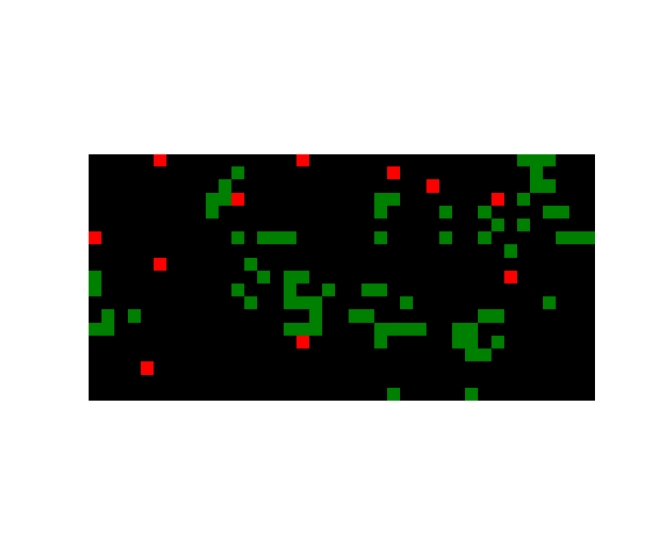

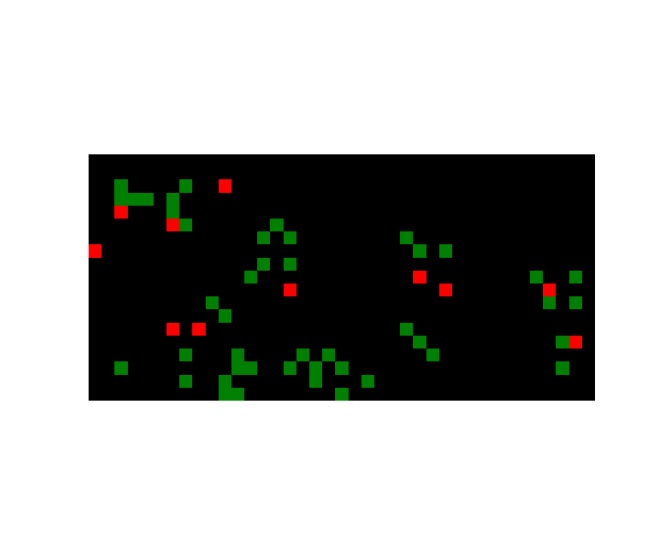

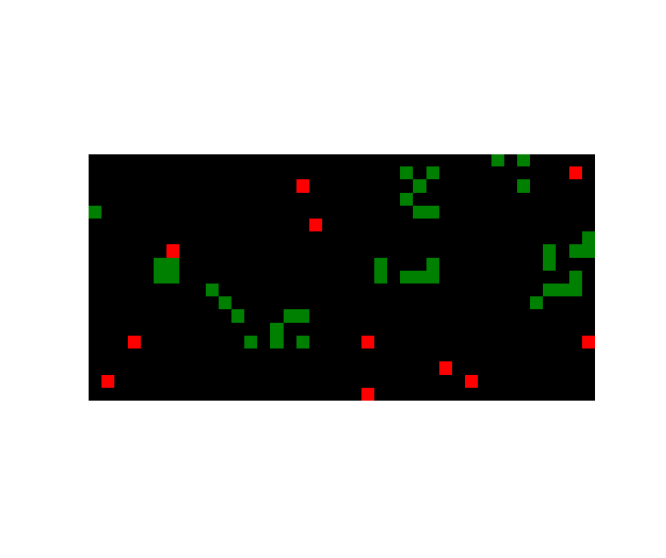

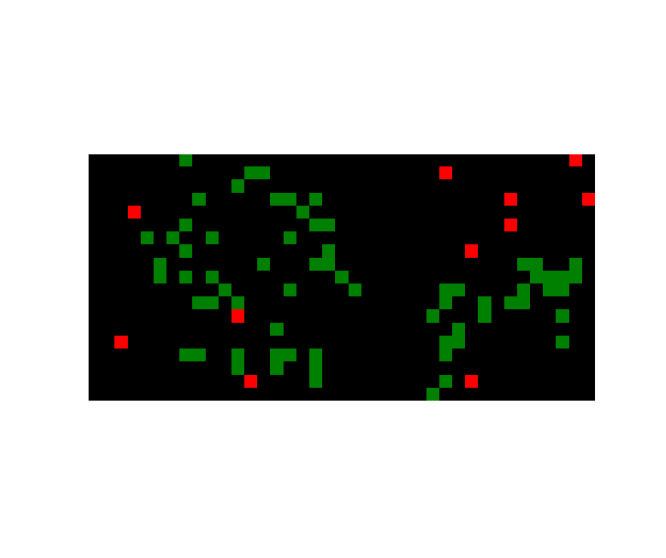

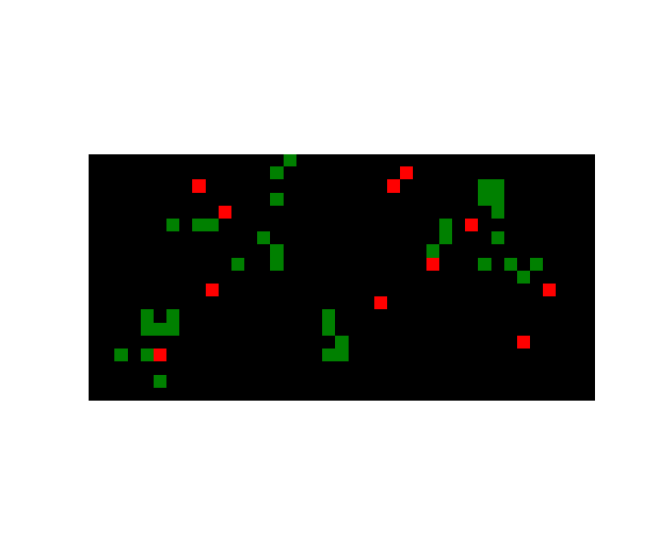

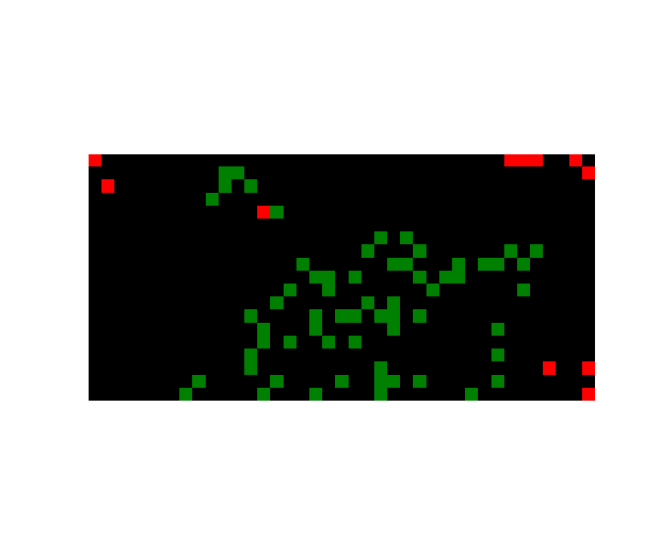

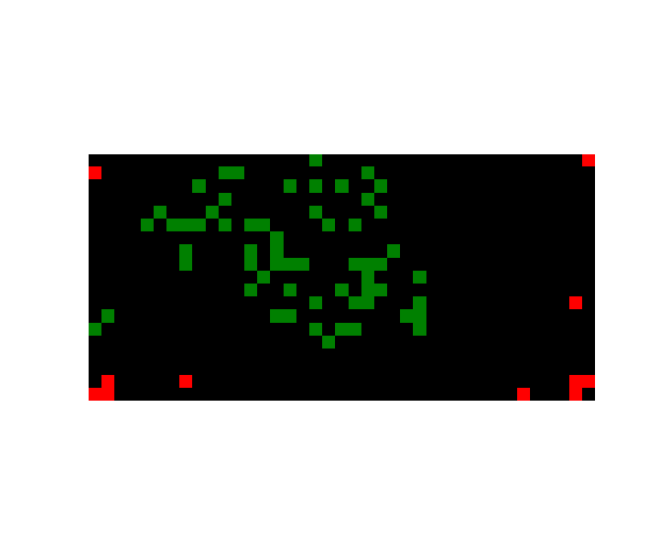

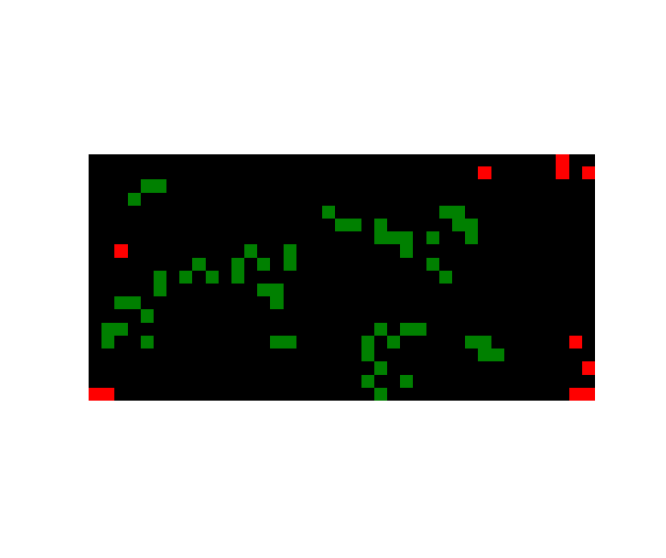

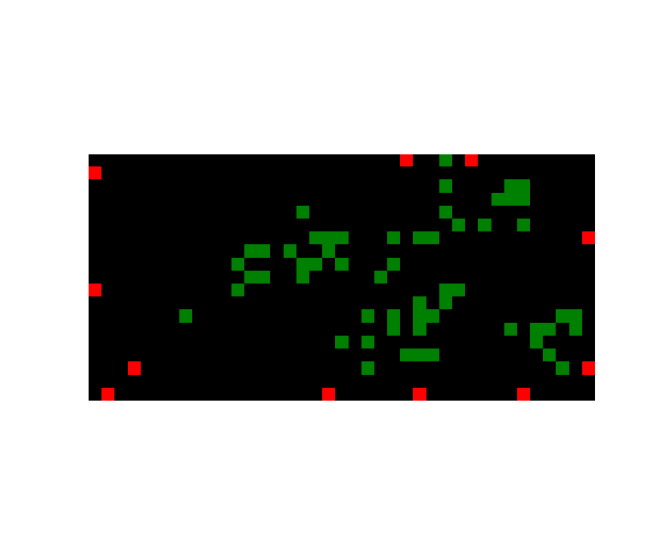

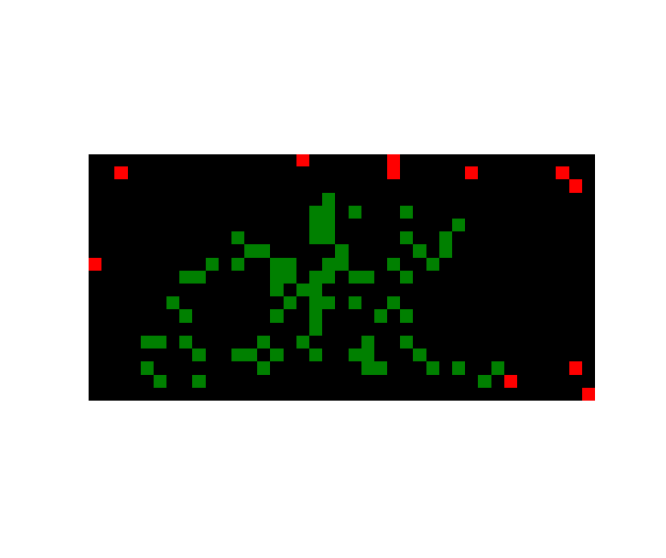

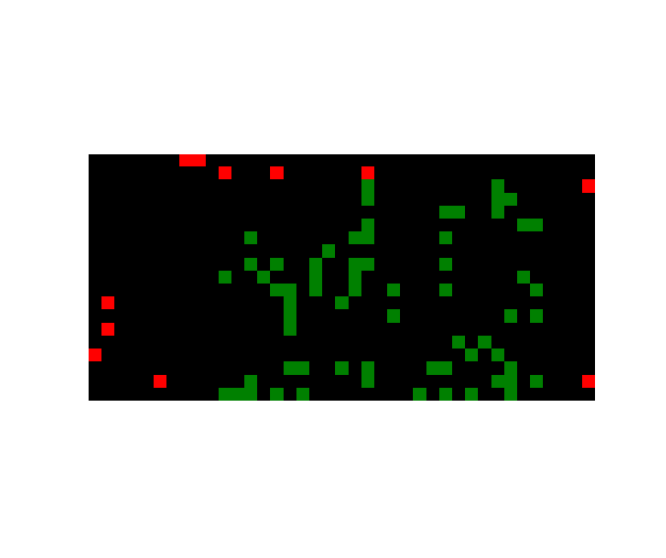

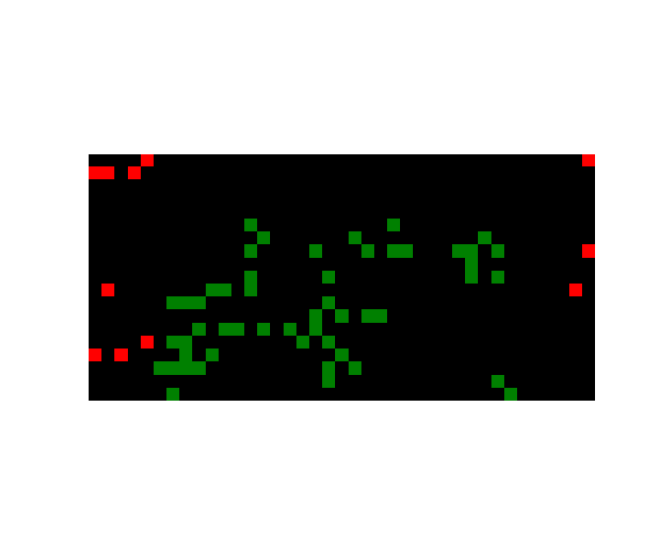

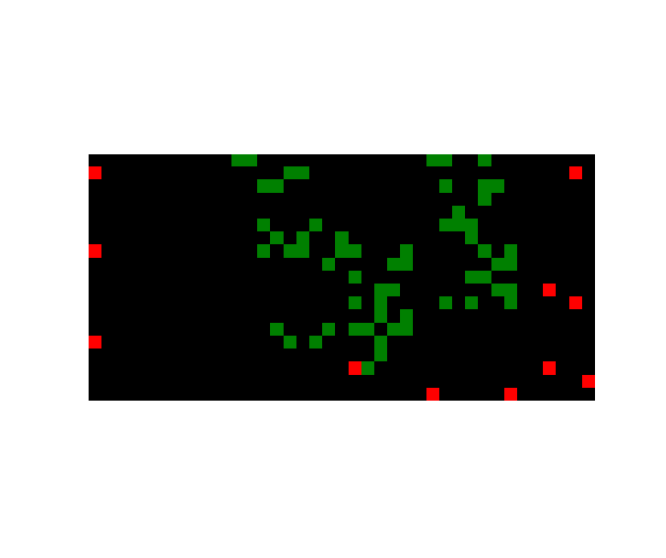

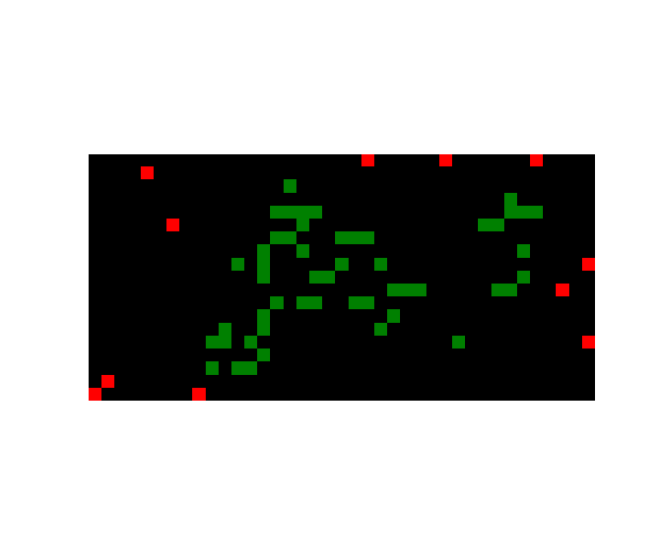

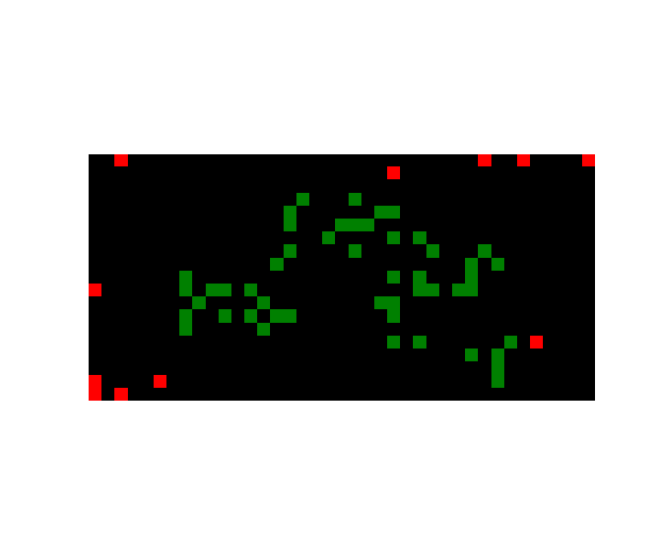

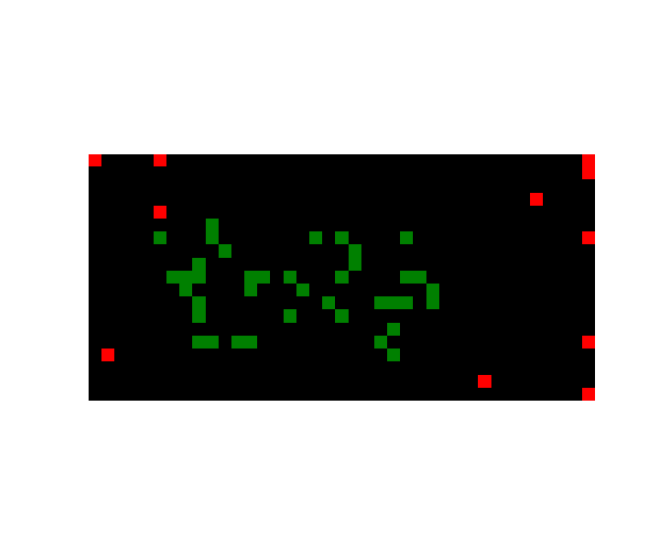

In [54]:
trpo_policy_nn = models.MLP(observation_space_size, hidden_sizes, action_space_size)
trpo_baseline_nn = models.MLP(observation_space_size, hidden_sizes, 1, log_softmax=False)
trpo_policy = policies.TRPOPolicy(env, trpo_policy_nn, trpo_baseline_nn, beta=beta, kl_target=kl_target)
trpo_policy.train(
    epochs,
    steps_per_epoch,
    enable_wandb=True,
    wandb_config={**wandb_config, "group": "TRPO"},
    render_every=render_every
)

## PPO

This section deals with training a set of Harvest agents using our custom Proximal Policy Optimization implementation.

In [ ]:
c1=1.0
c2=0.01
eps=0.2

In [ ]:
ppo_policy_nn = models.MLP(observation_space_size, hidden_sizes, action_space_size)
ppo_baseline_nn = models.MLP(observation_space_size, hidden_sizes, 1, log_softmax=False)
ppo_policy = policies.PPOPolicy(env, ppo_policy_nn, ppo_baseline_nn, c1=c1, c2=c2, eps=eps)
ppo_policy.train(
    epochs,
    steps_per_epoch,
    enable_wandb=True,
    wandb_config={**wandb_config, "group": "PPO"},
    render_every=render_every
)